<!-- omit in toc -->
# Deep Thinking Trading System

The trend is shifting from monolithic, single-purpose models to sophisticated **societies of agents**, where multiple specialized AIs collaborate to solve complex problems. This is particularly true in finance, where making a single decision requires synthesizing information from dozens of sources, from market charts and news headlines to social media sentiment and dense financial reports.

In this guide, we will build a complete, **standalone** implementation of a powerful financial analysis framework. We will define every component—from live data tools to complex agent logic—directly within this notebook, creating a self-contained pipeline that functions end-to-end.

We will use **LangGraph** to orchestrate this complex workflow, **LangSmith** for tracing, a suite of LLMs to power our agents, and live web search APIs to ground their analysis in real-world, up-to-the-minute information. By the end, you will have a deep, practical understanding of how to build, run, and evaluate a sophisticated agentic system for financial analysis.

<!-- omit in toc -->
## Table of Contents
- [**Part 1: Setting Up the Foundational Components**](#part-1-setting-up-the-foundational-components)
  - [1.1. Environment Variables and Core Imports](#11-environment-variables-and-core-imports)
  - [1.2. The Configuration Dictionary: The Control Panel for Our Agents](#12-the-configuration-dictionary-the-control-panel-for-our-agents)
  - [1.3. Initializing the Language Models (LLMs)](#13-initializing-the-language-models-llms)
  - [1.4. **Code Dependency:** Defining the `AgentState` and Other State Dictionaries](#14-code-dependency-defining-the-agentstate-and-other-state-dictionaries)
  - [1.5. **Code Dependency:** Defining the Live Data Tools and `Toolkit`](#15-code-dependency-defining-the-live-data-tools-and-toolkit)
  - [1.6. **Code Dependency:** Defining `FinancialSituationMemory` for Long-Term Learning](#16-code-dependency-defining-financialsituationmemory-for-long-term-learning)

- [**Part 2: The Analyst Team - Intelligence Gathering from Diverse Sources**](#part-2-the-analyst-team---intelligence-gathering-from-diverse-sources)
  - [2.1. **Code Dependency:** Defining the Analyst Agent Logic](#21-code-dependency-defining-the-analyst-agent-logic)
  - [2.2. Understanding the Analyst Workflow: The ReAct Loop in Action](#22-understanding-the-analyst-workflow-the-react-loop-in-action)
  - [2.3. Running the Analysts Sequentially and Examining Their Reports](#23-running-the-analysts-sequentially-and-examining-their-reports)

- [**Part 3: The Researcher Team - The Bull vs. Bear Investment Debate**](#part-3-the-researcher-team---the-bull-vs-bear-investment-debate)
  - [3.1. **Code Dependency:** Defining the Researcher and Manager Agent Logic](#31-code-dependency-defining-the-researcher-and-manager-agent-logic)
  - [3.2. Simulating the Bull vs. Bear Debate: Arguments and Rebuttals](#32-simulating-the-bull-vs-bear-debate-arguments-and-rebuttals)
  - [3.3. The Research Manager's Verdict: Synthesizing the Final Investment Plan](#33-the-research-managers-verdict-synthesizing-the-final-investment-plan)

- [**Part 4: From Proposal to Final Decision - The Trader and Risk Teams**](#part-4-from-proposal-to-final-decision---the-trader-and-risk-teams)
  - [4.1. **Code Dependency:** Defining the Trader and Risk Management Agent Logic](#41-code-dependency-defining-the-trader-and-risk-management-agent-logic)
  - [4.2. The Trader's Proposal: Creating an Actionable Plan](#42-the-traders-proposal-creating-an-actionable-plan)
  - [4.3. The Risk Management Debate: Aggressive, Conservative, and Neutral Perspectives](#43-the-risk-management-debate-aggressive-conservative-and-neutral-perspectives)
  - [4.4. The Final Judgment: The Portfolio Manager's Decision](#44-the-final-judgment-the-portfolio-managers-decision)

- [**Part 5: Assembling the Full LangGraph Workflow**](#part-5-assembling-the-full-langgraph-workflow)
  - [5.1. **Code Dependency:** Defining the Graph's Helper Logic](#51-code-dependency-defining-the-graphs-helper-logic)
  - [5.2. Creating the Tool Nodes for Execution](#52-creating-the-tool-nodes-for-execution)
  - [5.3. Building the `StateGraph`: Wiring All Agents Together](#53-building-the-stategraph-wiring-all-agents-together)
  - [5.4. Compiling and Visualizing the Complete Agentic Workflow](#54-compiling-and-visualizing-the-complete-agentic-workflow)

- [**Part 6: The Grand Finale - Running the Full Pipeline**](#part-6-the-grand-finale---running-the-full-pipeline)
  - [6.1. Defining the Input: Ticker and Date](#61-defining-the-input-ticker-and-date)
  - [6.2. Invoking the Graph: A Step-by-Step Trace of the Full Run](#62-invoking-the-graph-a-step-by-step-trace-of-the-full-run)
  - [6.3. Analyzing the Final State and Raw Output](#63-analyzing-the-final-state-and-raw-output)

- [**Part 7: Finalizing Output and Enabling the Learning Loop**](#part-7-finalizing-output-and-enabling-the-learning-loop)
  - [7.1. **Code Dependency:** Defining the Signal Processor and Reflection Engine](#71-code-dependency-defining-the-signal-processor-and-reflection-engine)
  - [7.2. Extracting a Clean BUY, SELL, or HOLD Signal](#72-extracting-a-clean-buy-sell-or-hold-signal)
  - [7.3. Simulating the Learning Loop: How Agents Learn from Outcomes](#73-simulating-the-learning-loop-how-agents-learn-from-outcomes)

- [**Part 8: A Multi-Faceted Evaluation Framework**](#part-8-a-multi-faceted-evaluation-framework)
  - [8.1. Evaluation Technique 1: LLM-as-a-Judge](#81-evaluation-technique-1-llm-as-a-judge)
    - [8.1.1. Defining the Criteria and Running the Judge](#811-defining-the-criteria-and-running-the-judge)
  - [8.2. Evaluation Technique 2: Ground Truth Comparison (Backtesting)](#82-evaluation-technique-2-ground-truth-comparison-backtesting)
    - [8.2.1. Checking the Decision Against Actual Market Performance](#821-checking-the-decision-against-actual-market-performance)
  - [8.3. Evaluation Technique 3: Factual Consistency Audit](#83-evaluation-technique-3-factual-consistency-audit)
    - [8.3.1. Building an Auditor Agent to Check for Hallucinations](#831-building-an-auditor-agent-to-check-for-hallucinations)
  - [8.4. Evaluation Technique 4: Tool Usage Analysis](#84-evaluation-technique-4-tool-usage-analysis)
    - [8.4.1. Analyzing Agent Efficiency and Correctness with LangSmith](#841-analyzing-agent-efficiency-and-correctness-with-langsmith)
  - [8.5. Synthesizing the Evaluation Results](#85-synthesizing-the-evaluation-results)

- [**Part 9: Conclusion and Future Directions**](#part-9-conclusion-and-future-directions)

## Part 1: Setting Up the Foundational Components

Before we can build our society of agents, we need to lay the groundwork. This initial phase is all about setting up the essential components that will power our entire system. We'll configure our API keys, define the global settings, initialize the language models, and—most importantly for a standalone notebook—define all the core classes and functions for state, tools, and memory directly in our code.

### 1.1. Environment Variables and Core Imports

First things first, we need to securely manage our API keys and set up tracing with LangSmith. Tracing is crucial for a complex multi-agent system, as it allows us to visualize the exact flow of operations, debug issues, and understand each agent's reasoning process. We'll be using **Tavily** for our live web search capabilities, so we'll need an API key for that as well.

In [1]:
# First, ensure you have the necessary libraries installed
# !pip install -U langchain langgraph langchain_openai tavily-python yfinance finnhub-python stockstats bs4 chromadb rich

import os
from getpass import getpass
from decouple import Config, RepositoryEnv
config = Config(RepositoryEnv('../.env'))

def _set_env(var: str):
    if not os.environ.get(var):
        try:
            os.environ[var] = config(var)
        except Exception :
            print("enter your api")
            os.environ[var] = getpass(f"Enter your {var}: ")


_set_env("OPENAI_API_KEY")
_set_env("FINNHUB_API_KEY")
_set_env("TAVILY_API_KEY")
_set_env("LANGSMITH_API_KEY")

# Enable LangSmith tracing for full observability
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "trading agent project v1"

print("Environment variables set successfully.")

Environment variables set successfully.


### 1.2. The Configuration Dictionary: The Control Panel for Our Agents

We'll use a central configuration dictionary to make our system modular and easy to tweak. Here, we can define everything from which LLMs to use to the number of debate rounds for our researcher agents.

In [2]:
from pprint import pprint

# Define our central configuration for this notebook run
config = {
    "results_dir": "./results",
    # LLM settings
    "llm_provider": "openai",
    "deep_think_llm": "gpt-4o",  # Powerful model for complex reasoning
    "quick_think_llm": "gpt-4o-mini",  # Fast, cheaper model for data processing
    "backend_url": "https://api.openai.com/v1",
    # Debate and discussion settings
    "max_debate_rounds": 2,  # Bull vs. Bear will have 2 rounds of debate
    "max_risk_discuss_rounds": 1,  # Risk team has 1 round of debate
    "max_recur_limit": 100,
    # Tool settings
    "online_tools": True,  # Use live APIs instead of cached data
    "data_cache_dir": "./data_cache",  # Directory for caching online data
}

# Create the cache directory if it doesn't exist
os.makedirs(config["data_cache_dir"], exist_ok=True)

print("Configuration dictionary created:")
pprint(config)

Configuration dictionary created:
{'backend_url': 'https://api.openai.com/v1',
 'data_cache_dir': './data_cache',
 'deep_think_llm': 'gpt-4o',
 'llm_provider': 'openai',
 'max_debate_rounds': 2,
 'max_recur_limit': 100,
 'max_risk_discuss_rounds': 1,
 'online_tools': True,
 'quick_think_llm': 'gpt-4o-mini',
 'results_dir': './results'}


### 1.3. Initializing the Language Models (LLMs)

With our configuration defined, we can now initialize the LLMs that will serve as the cognitive engines for our agents: a `deep_thinking_llm` for complex tasks and a `quick_thinking_llm` for faster, routine tasks.

In [3]:
from langchain_openai import ChatOpenAI

deep_thinking_llm = ChatOpenAI(model=config["deep_think_llm"], base_url=config["backend_url"], temperature=0.1)

quick_thinking_llm = ChatOpenAI(model=config["quick_think_llm"], base_url=config["backend_url"], temperature=0.1)

print("LLMs initialized successfully.")
print(f"Deep Thinking LLM: {deep_thinking_llm}")
print(f"Quick Thinking LLM: {quick_thinking_llm}")

LLMs initialized successfully.
Deep Thinking LLM: client=<openai.resources.chat.completions.completions.Completions object at 0x11413e3c0> async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x11413ee40> root_client=<openai.OpenAI object at 0x11413c1a0> root_async_client=<openai.AsyncOpenAI object at 0x11413eba0> model_name='gpt-4o' temperature=0.1 model_kwargs={} openai_api_key=SecretStr('**********') openai_api_base='https://api.openai.com/v1'
Quick Thinking LLM: client=<openai.resources.chat.completions.completions.Completions object at 0x1144e5810> async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1144e5bd0> root_client=<openai.OpenAI object at 0x1144e5590> root_async_client=<openai.AsyncOpenAI object at 0x1144e5950> model_name='gpt-4o-mini' temperature=0.1 model_kwargs={} openai_api_key=SecretStr('**********') openai_api_base='https://api.openai.com/v1'


### 1.4. Code Dependency: Defining the `AgentState` and Other State Dictionaries

The `AgentState` is the shared memory of our entire multi-agent system. As each agent completes its task, it reads from and writes to this state. We define the data structures for this global memory directly in the cell below.

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import MessagesState


# State for the researcher team's debate
class InvestDebateState(TypedDict):
    bull_history: str
    bear_history: str
    history: str
    current_response: str
    judge_decision: str
    count: int


# State for the risk management team's debate
class RiskDebateState(TypedDict):
    risky_history: str
    safe_history: str
    neutral_history: str
    history: str
    latest_speaker: str
    current_risky_response: str
    current_safe_response: str
    current_neutral_response: str
    judge_decision: str
    count: int


# The main state that will be passed through the entire graph
class AgentState(MessagesState):
    company_of_interest: str
    trade_date: str
    sender: str
    market_report: str
    sentiment_report: str
    news_report: str
    fundamentals_report: str
    investment_debate_state: InvestDebateState
    investment_plan: str
    trader_investment_plan: str
    risk_debate_state: RiskDebateState
    final_trade_decision: str


print("AgentState, InvestDebateState, and RiskDebateState defined successfully.")

AgentState, InvestDebateState, and RiskDebateState defined successfully.


### 1.5. Code Dependency: Defining the Live Data Tools and `Toolkit`

An agent is only as good as its tools. The `Toolkit` class is where we define all the functions our agents can use to interact with the outside world. We'll define functions to fetch data from Yahoo Finance, Finnhub, and live web searches via Tavily. Each function is decorated with `@tool` to make it discoverable by the agents.

In [5]:
import yfinance as yf
import finnhub
from datetime import datetime, timedelta
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from stockstats import wrap as stockstats_wrap


# --- Tool Implementations ---


@tool
def get_yfinance_data(
        symbol: Annotated[str, "ticker symbol of the company"],
        start_date: Annotated[str, "Start date in yyyy-mm-dd format"],
        end_date: Annotated[str, "End date in yyyy-mm-dd format"],
) -> str:
    """Retrieve the stock price data for a given ticker symbol from Yahoo Finance."""
    try:
        ticker = yf.Ticker(symbol.upper())
        data = ticker.history(start=start_date, end=end_date)
        if data.empty:
            return f"No data found for symbol '{symbol}' between {start_date} and {end_date}"
        return data.to_csv()
    except Exception as e:
        return f"Error fetching Yahoo Finance data: {e}"


@tool
def get_technical_indicators(
        symbol: Annotated[str, "ticker symbol of the company"],
        start_date: Annotated[str, "Start date in yyyy-mm-dd format"],
        end_date: Annotated[str, "End date in yyyy-mm-dd format"],
) -> str:
    """Retrieve key technical indicators for a stock using stockstats library."""
    try:
        df = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if df.empty:
            return "No data to calculate indicators."
        stock_df = stockstats_wrap(df)
        indicators = stock_df[["macd", "rsi_14", "boll", "boll_ub", "boll_lb", "close_50_sma", "close_200_sma"]]
        return indicators.tail().to_csv()  # Return last 5 days for brevity
    except Exception as e:
        return f"Error calculating stockstats indicators: {e}"


@tool
def get_finnhub_news(ticker: str, start_date: str, end_date: str) -> str:
    """Get company news from Finnhub within a date range."""
    try:
        finnhub_client = finnhub.Client(api_key=os.environ["FINNHUB_API_KEY"])
        news_list = finnhub_client.company_news(ticker, _from=start_date, to=end_date)
        news_items = []
        for news in news_list[:5]:  # Limit to 5 results
            news_items.append(f"Headline: {news['headline']}\nSummary: {news['summary']}")
        return "\n\n".join(news_items) if news_items else "No Finnhub news found."
    except Exception as e:
        return f"Error fetching Finnhub news: {e}"


# The following three tools use Tavily for live, real-time web search.
tavily_tool = TavilySearchResults(max_results=3)


@tool
def get_social_media_sentiment(ticker: str, trade_date: str) -> str:
    """Performs a live web search for social media sentiment regarding a stock."""
    query = f"social media sentiment and discussions for {ticker} stock around {trade_date}"
    return tavily_tool.invoke({"query": query})


@tool
def get_fundamental_analysis(ticker: str, trade_date: str) -> str:
    """Performs a live web search for recent fundamental analysis of a stock."""
    query = f"fundamental analysis and key financial metrics for {ticker} stock published around {trade_date}"
    return tavily_tool.invoke({"query": query})


@tool
def get_macroeconomic_news(trade_date: str) -> str:
    """Performs a live web search for macroeconomic news relevant to the stock market."""
    query = f"macroeconomic news and market trends affecting the stock market on {trade_date}"
    return tavily_tool.invoke({"query": query})


# --- Toolkit Class ---
class Toolkit:
    def __init__(self, config):
        self.config = config
        self.get_yfinance_data = get_yfinance_data
        self.get_technical_indicators = get_technical_indicators
        self.get_finnhub_news = get_finnhub_news
        self.get_social_media_sentiment = get_social_media_sentiment
        self.get_fundamental_analysis = get_fundamental_analysis
        self.get_macroeconomic_news = get_macroeconomic_news


toolkit = Toolkit(config)
print("Toolkit class defined and instantiated with live data tools.")


Toolkit class defined and instantiated with live data tools.


/var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/ipykernel_25831/2057142588.py:62: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults(max_results=3)


### 1.6. Code Dependency: Defining `FinancialSituationMemory` for Long-Term Learning

For our agents to improve, they need long-term memory. The `FinancialSituationMemory` class uses a `ChromaDB` vector store to save reflections on past decisions. When a similar market situation arises, an agent can retrieve these memories to avoid repeating mistakes. We define the class here and then create instances for each learning agent.

In [6]:
import chromadb
from openai import OpenAI


class FinancialSituationMemory:
    def __init__(self, name, config):
        self.embedding_model = "text-embedding-3-small"
        self.client = OpenAI(base_url=config["backend_url"])
        # Use a persistent client for real applications, but in-memory is fine for a notebook.
        self.chroma_client = chromadb.Client(chromadb.config.Settings(allow_reset=True))
        self.situation_collection = self.chroma_client.create_collection(name=name)

    def get_embedding(self, text):
        response = self.client.embeddings.create(model=self.embedding_model, input=text)
        return response.data[0].embedding

    def add_situations(self, situations_and_advice):
        if not situations_and_advice:
            return
        offset = self.situation_collection.count()
        ids = [str(offset + i) for i, _ in enumerate(situations_and_advice)]
        situations = [s for s, r in situations_and_advice]
        recommendations = [r for s, r in situations_and_advice]
        embeddings = [self.get_embedding(s) for s in situations]
        self.situation_collection.add(
            documents=situations,
            metadatas=[{"recommendation": rec} for rec in recommendations],
            embeddings=embeddings,
            ids=ids,
        )

    def get_memories(self, current_situation, n_matches=1):
        if self.situation_collection.count() == 0:
            return []
        query_embedding = self.get_embedding(current_situation)
        results = self.situation_collection.query(
            query_embeddings=[query_embedding],
            n_results=min(n_matches, self.situation_collection.count()),
            include=["metadatas"],
        )
        return [{"recommendation": meta["recommendation"]} for meta in results["metadatas"][0]]


print("FinancialSituationMemory class defined.")

bull_memory = FinancialSituationMemory("bull_memory", config)
bear_memory = FinancialSituationMemory("bear_memory", config)
trader_memory = FinancialSituationMemory("trader_memory", config)
invest_judge_memory = FinancialSituationMemory("invest_judge_memory", config)
risk_manager_memory = FinancialSituationMemory("risk_manager_memory", config)

print("FinancialSituationMemory instances created for 5 agents.")

FinancialSituationMemory class defined.
FinancialSituationMemory instances created for 5 agents.


## Part 2: The Analyst Team - Intelligence Gathering from Diverse Sources

With our foundation in place, it's time to introduce the first team of agents: the Analysts. This team is the intelligence-gathering arm of our firm. Each analyst has a specific domain of expertise and is equipped with a unique set of tools to gather live data. Their collective goal is to produce a comprehensive, 360-degree view of the stock and its market environment.

### 2.1. Code Dependency: Defining the Analyst Agent Logic

Each analyst is a Python function that takes the current `AgentState` as input and returns an updated state. Inside each function, we construct a prompt that defines the agent's role, bind the relevant tools from our `Toolkit`, and invoke the `quick_thinking_llm`.

In [30]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


def create_analyst_node(llm, toolkit, system_message, tools, output_field):
    # This function creates a LangGraph node for a specific type of analyst.
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK; another assistant with different tools"
                " will help where you left off. Execute what you can to make progress."
                " You have access to the following tools: {tool_names}.\n{system_message}"
                " For your reference, the current date is {current_date}. The company we want to look at is {ticker}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))



    def analyst_node(state):
        # The node function itself, which will be called by LangGraph.
        prompt_with_data = prompt.partial(current_date=state["trade_date"], ticker=state["company_of_interest"])
        chain = prompt_with_data | llm.bind_tools(tools)
        result = chain.invoke(state["messages"])
        # print(result)
        report = ""
        # If the LLM didn't call a tool, it means it has the final report.

        if not result.tool_calls:
            report = result.content
        return {"messages": [result], output_field: report}

    return analyst_node


# Market Analyst: Focuses on technical indicators and price action.
market_analyst_system_message = "You are a trading assistant specialized in analyzing financial markets. Your role is to select the most relevant technical indicators to analyze a stock's price action, momentum, and volatility. You must use your tools to get historical data and then generate a report with your findings, including a summary table."
market_analyst_node = create_analyst_node(
    quick_thinking_llm,
    toolkit,
    market_analyst_system_message,
    [toolkit.get_yfinance_data, toolkit.get_technical_indicators],
    "market_report",
)

# Social Media Analyst: Gauges public sentiment.
social_analyst_system_message = """You are a social media analyst. Your job is to analyze social media posts and public sentiment for a specific company over the past week. Use your tools to find relevant discussions and write a comprehensive report detailing your analysis, insights, and implications for traders, including a summary table."""
social_analyst_node = create_analyst_node(
    quick_thinking_llm, toolkit, social_analyst_system_message, [toolkit.get_social_media_sentiment], "sentiment_report"
)

# News Analyst: Covers company-specific and macroeconomic news.
news_analyst_system_message = """You are a news researcher analyzing recent news and trends over the past week. Write a comprehensive report on the current state of the world relevant for trading and macroeconomics. Use your tools to be comprehensive and provide detailed analysis, including a summary table."""
news_analyst_node = create_analyst_node(
    quick_thinking_llm,
    toolkit,
    news_analyst_system_message,
    [toolkit.get_finnhub_news, toolkit.get_macroeconomic_news],
    "news_report",
)

# Fundamentals Analyst: Dives into the company's financial health.
fundamentals_analyst_system_message = """You are a researcher analyzing fundamental information about a company. Write a comprehensive report on the company's financials, insider sentiment, and transactions to gain a full view of its fundamental health, including a summary table."""
fundamentals_analyst_node = create_analyst_node(
    quick_thinking_llm,
    toolkit,
    fundamentals_analyst_system_message,
    [toolkit.get_fundamental_analysis],
    "fundamentals_report",
)

print("Analyst agent creation functions are now available.")

Analyst agent creation functions are now available.


### 2.2. Understanding the Analyst Workflow: The ReAct Loop in Action

It's important to understand *how* these agents work. They use a pattern called **ReAct (Reasoning and Acting)**. This isn't a single LLM call; it's a loop:

1.  **Reason:** The LLM receives the prompt and decides if it needs a tool.
2.  **Act:** If so, it generates a `tool_call` (e.g., `toolkit.get_yfinance_data(...)`).
3.  **Observe:** Our graph executes this tool, and the result (the data) is passed back to the LLM.
4.  **Repeat:** The LLM now has new information and decides its next step—either calling another tool or generating the final report.

This loop allows the agents to perform complex, multi-step data gathering tasks autonomously.

### 2.3. Running the Analysts Sequentially and Examining Their Reports

Now, let's execute our analyst agents. We'll start with an initial state containing our target company and date, and then pass this state through each analyst node in sequence. After each step, we'll print the new report to see how the `AgentState` is progressively enriched.

In [55]:
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage
import datetime
from rich.console import Console
from rich.markdown import Markdown

console = Console()

TICKER = "NVDA"
# Use a recent date for live data fetching
TRADE_DATE = (datetime.date.today() - datetime.timedelta(days=2)).strftime("%Y-%m-%d")

initial_state = AgentState(
    messages=[HumanMessage(content=f"Analyze {TICKER} for trading on {TRADE_DATE}")],
    company_of_interest=TICKER,
    trade_date=TRADE_DATE,
    investment_debate_state=InvestDebateState(
        {
            "history": "",
            "current_response": "",
            "count": 0,
            "bull_history": "",
            "bear_history": "",
            "judge_decision": "",
        }
    ),
    risk_debate_state=RiskDebateState(
        {
            "history": "",
            "latest_speaker": "",
            "current_risky_response": "",
            "current_safe_response": "",
            "current_neutral_response": "",
            "count": 0,
            "risky_history": "",
            "safe_history": "",
            "neutral_history": "",
            "judge_decision": "",
        }
    ),
)


def run_analyst(analyst_node, initial_state):
    state = initial_state
    # Get all available tools from our toolkit instance.
    all_tools_in_toolkit = [getattr(toolkit, name) for name in dir(toolkit) if callable(getattr(toolkit, name)) and not name.startswith("__")]
    # The ToolNode is a special LangGraph node that executes tool calls.
    tool_node = ToolNode(all_tools_in_toolkit)
    # The ReAct loop can have up to 5 steps of reasoning and tool calls.
    for step in range(5):
        result = analyst_node(state)
        print(result['messages'][-1])
        # The tools_condition checks if the LLM's last message was a tool call.
        if tools_condition(result) == "tools":
            print(f"Step {step + 1}: Calling tools: {[tc['name'] for tc in result['messages'][-1].tool_calls]}")
            state.update(result)
            # Then execute the tools and get tool responses
            tool_result = tool_node.invoke(state)
            print(f"Step {step + 1}: Tools completed")
            # Update state with tool results, but handle messages carefully
            for key, value in tool_result.items():
                if key == "messages":
                    # Append tool response messages to existing messages
                    state["messages"].extend(value)
                else:
                    state[key] = value
        else:
            # If not, the agent is done, so we break the loop.
            state.update(result)
            break
    return state


# Run Market Analyst
print("Running Market Analyst...")
market_analyst_result = run_analyst(market_analyst_node, initial_state)
initial_state["market_report"] = market_analyst_result.get("market_report", "Failed to generate report.")
console.print("----- Market Analyst Report -----")
console.print(Markdown(initial_state["market_report"]))

Running Market Analyst...
content='' additional_kwargs={'tool_calls': [{'id': 'call_DxYBcXPHWiuBnOBtROGMMdpV', 'function': {'arguments': '{"symbol": "NVDA", "start_date": "2023-10-04", "end_date": "2025-10-04"}', 'name': 'get_yfinance_data'}, 'type': 'function'}, {'id': 'call_aYbMBcm4UldVRQyCMrvYr7gz', 'function': {'arguments': '{"symbol": "NVDA", "start_date": "2023-10-04", "end_date": "2025-10-04"}', 'name': 'get_technical_indicators'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 318, 'total_tokens': 409, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CNcR0xCqVPsVZqck2G9t8P3kvxbOP', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='ru

/var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/ipykernel_25831/2057142588.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date, progress=False)


content='### NVDA Stock Analysis Report\n\n#### Historical Price Data (Last Year)\nThe following table summarizes the historical price data for NVIDIA Corporation (NVDA) over the last year:\n\n| Date       | Open      | High      | Low       | Close     | Volume      |\n|------------|-----------|-----------|-----------|-----------|-------------|\n| 2023-10-04 | 43.72     | 44.12     | 43.27     | 44.02     | 361,821,000 |\n| 2023-10-05 | 44.02     | 44.87     | 43.86     | 44.66     | 393,483,000 |\n| 2023-10-06 | 44.17     | 45.76     | 44.00     | 45.74     | 434,436,000 |\n| 2023-10-07 | 45.25     | 46.23     | 45.06     | 45.77     | 368,582,000 |\n| 2023-10-08 | 46.17     | 46.83     | 46.02     | 46.78     | 378,137,000 |\n| ...        | ...       | ...       | ...       | ...       | ...         |\n| 2025-10-01 | 185.24    | 188.14    | 183.90    | 187.24    | 173,844,900 |\n| 2025-10-02 | 189.60    | 191.05    | 188.06    | 188.89    | 136,805,800 |\n| 2025-10-03 | 189.19    | 

----- Market Analyst Report -----

NVDA Stock Analysis Report                                             

                                         Historical Price Data (Last Year)                                         

The following table summarizes the historical price data for NVIDIA Corporation (NVDA) over the last year:         

                                                                
  Date         Open     High     Low      Close    Volume       
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  2023-10-04   43.72    44.12    43.27    44.02    361,821,000  
  2023-10-05   44.02    44.87    43.86    44.66    393,483,000  
  2023-10-06   44.17    45.76    44.00    45.74    434,436,000  
  2023-10-07   45.25    46.23    45.06    45.77    368,582,000  
  2023-10-08   46.17    46.83    46.02    46.78    378,137,000  
  ...          ...      ...      ...      ...      ...          
  2025-10-01   185.24   188.14   183.90   187.24   173,844,900  
  2025-10-02   189.60   191.05   188.06   188.89   136,805,800  
  2025-10-03   189.19   190.36   185.38   187.62   137,340,500  
                                                                

                                               Technical Indicators                                                

The following table summarizes key technical indicators for NVDA:                                                  

                                                                                                       
  Date         MACD   RSI (14)   Bollinger Bands   Upper Band   Lower Band   50-day SMA   200-day SMA  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  2025-09-29   1.23   58.04      176.74            184.15       166.25       142.02       142.02       
  2025-09-30   1.84   63.24      177.05            186.02       165.96       142.28       142.28       
  2025-10-01   2.35   63.91      177.45            187.70       165.94       142.52       142.52       
  2025-10-02   2.86   65.60      178.09            189.52       165.84       142.78       142.78       
  2025-10-03   3.12   63.15      178.09            190.23       167.20       143.04       143.04       
                                                                                                       

                                                Summary of Findings                                                

 • Price Movement: NVDA has shown significant price movement over the past year, with a notable increase in price  
   from around $43 to over $187.                                                                                   
 • Momentum Indicators: The MACD values indicate a bullish momentum, especially with values above 1.0 in recent    
   days.                                                                                                           
 • Relative Strength Index (RSI): The RSI values are generally above 50, indicating that the stock is in a bullish 
   trend, with some days approaching overbought territory (above 70).                                              
 • Bollinger Bands: The price is currently trading near the upper Bollinger Band, suggesting that the stock may be 
   overbought in the short term.                                                                                   
 • Moving Averages: The 50-day and 200-day SMAs are both trending upwards, indicating a strong bullish trend.      

                                                    Conclusion                                                     

NVIDIA Corporation (NVDA) has demonstrated strong bullish momentum over the past year, with significant price      
increases and positive technical indicators. Investors should monitor the RSI and Bollinger Bands for potential    
overbought conditions, while the upward trend in moving averages supports a continued bullish outlook.

In [53]:
initial_state["messages"]
for m in initial_state['messages']:
    m.pretty_print()

================================== Ai Message ==================================

### NVDA Stock Analysis Report

#### Historical Price Data (Last 30 Days)
| Date       | Open     | High     | Low      | Close    | Volume      |
|------------|----------|----------|----------|----------|-------------|
| 2025-09-29 | 180.43   | 184.00   | 180.32   | 181.85   | 193,063,500 |
| 2025-09-30 | 182.08   | 187.35   | 181.48   | 186.58   | 236,981,000 |
| 2025-10-01 | 185.24   | 188.14   | 183.90   | 187.24   | 173,844,900 |
| 2025-10-02 | 189.60   | 191.05   | 188.06   | 188.89   | 136,805,800 |
| 2025-10-03 | 189.19   | 190.36   | 185.38   | 187.62   | 137,340,500 |

#### Technical Indicators
| Indicator         | Value          |
|-------------------|----------------|
| MACD              | 2.35           |
| RSI (14)          | 63.91          |
| Bollinger Bands   |                |
| Upper Band        | 190.23         |
| Lower Band        | 167.20         |
| 50-day SMA        | 178.09     

In [60]:

# Run Social Media Analyst
print("\nRunning Social Media Analyst...")
social_analyst_result = run_analyst(social_analyst_node, initial_state)
initial_state["sentiment_report"] = social_analyst_result.get("sentiment_report", "Failed to generate report.")
console.print("----- Social Media Analyst Report -----")
console.print(Markdown(initial_state["sentiment_report"]))


Running Social Media Analyst...
content='' additional_kwargs={'tool_calls': [{'id': 'call_wkdIHDQr74Ev5MIgSFgaGkLM', 'function': {'arguments': '{"ticker":"NVDA","trade_date":"2025-10-04"}', 'name': 'get_social_media_sentiment'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 1163, 'total_tokens': 1191, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CNgJR642XQwPDwiaJJZx7biFdR3yL', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--2492197f-0e8f-47f7-ac34-a0dd57f3ac27-0' tool_calls=[{'name': 'get_social_media_sentiment', 'args': {'ticker': 'NVDA', 'trade_date': '2025-10-04'}, 'id': 'call_wkdIHDQr74Ev5MIgSFgaGkLM', 'type': 'tool_call'}] 

----- Social Media Analyst Report -----

Social Media Sentiment Analysis for NVIDIA (NVDA) - Week of October 4, 2025                    

                                                     Overview                                                      

This report analyzes the social media sentiment surrounding NVIDIA (NVDA) over the past week, utilizing data from  
various platforms including Reddit and InvestorsHub. The sentiment analysis provides insights into investor mood   
and potential implications for traders.                                                                            

                                                 Sentiment Summary                                                 

 • Overall Sentiment Score: 78.6% (aggregated from various sources)                                                
 • Positive Mentions: 50%                                                                                          
 • Negative Mentions: 20%                                                                                          
 • Neutral Mentions: 30%                                                                                           

                                                 Detailed Insights                                                 

 1 NVIDIA Sentiment Statistics:                                                                                    
    • Source: ]8;id=99454;https://altindex.com/ticker/nvda/sentiment\AltIndex]8;;\                                                                                             
    • Score: 81 (indicating a predominantly positive sentiment)                                                    
    • Comparison with Competitors:                                                                                 
       • AMD: 81                                                                                                   
       • Intel: 75                                                                                                 
       • TSMC: 83                                                                                                  
       • Micron Technology: 80                                                                                     
       • Broadcom: 82                                                                                              
 2 Trends and Media Mentions:                                                                                      
    • Source: ]8;id=398206;https://www.marketbeat.com/stocks/NASDAQ/NVDA/trends-and-sentiment/\MarketBeat]8;;\                                                                                           
    • Media Mentions Last Week: 254                                                                                
    • Current Week: 230 (a decrease of 9.4%)                                                                       
    • New Followers: Increased from 81 last week to 302 this week (+272.8%)                                        
 3 Investor Discussions:                                                                                           
    • Source: ]8;id=368723;https://investorshub.advfn.com/NVIDIA-Corp-NVDA-6290\InvestorsHub]8;;\                                                                                         
    • Discussions indicate a mix of bullish sentiment with some caution regarding potential market corrections.    
      Notable mentions include:                                                                                    
       • "The NVDA bubble continues" - indicating some skepticism about sustainability.                            
       • "Another all-time high today" - reflecting optimism among certain investors.                              

                                             Implications for Traders                                              

 • Bullish Sentiment: The overall positive sentiment suggests that trad

In [64]:

# Run News Analyst
print("\nRunning News Analyst...")
news_analyst_result = run_analyst(news_analyst_node, initial_state)
initial_state["news_report"] = news_analyst_result.get("news_report", "Failed to generate report.")
console.print("----- News Analyst Report -----")
console.print(Markdown(initial_state["news_report"]))

# Run Fundamentals Analyst
print("\nRunning Fundamentals Analyst...")
fundamentals_analyst_result = run_analyst(fundamentals_analyst_node, initial_state)
initial_state["fundamentals_report"] = fundamentals_analyst_result.get(
    "fundamentals_report", "Failed to generate report."
)
console.print("----- Fundamentals Analyst Report -----")
console.print(Markdown(initial_state["fundamentals_report"]))


Running News Analyst...
content='' additional_kwargs={'tool_calls': [{'id': 'call_XKkoazBVi1KllYvgX5CIBsQz', 'function': {'arguments': '{"ticker": "NVDA", "start_date": "2025-09-27", "end_date": "2025-10-04"}', 'name': 'get_finnhub_news'}, 'type': 'function'}, {'id': 'call_AJ1XUUnm6suQ339VXMDYRq0n', 'function': {'arguments': '{"trade_date": "2025-10-04"}', 'name': 'get_macroeconomic_news'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 931, 'total_tokens': 1008, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CNgKQii67D4cqYvlj4HCrvy7d7lhg', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--ff8de811-b3ac-4bc5-9312-e569c7783f33-0' tool

----- News Analyst Report -----

Current State of the World Relevant for Trading and Macroeconomics (Week of October 4, 2025)            

                                                     Overview                                                      

The financial markets have shown resilience, with the S&P 500 achieving three new highs last week and closing      
September up 3.5%. This bullish trend continues from a strong performance since October 2022. However, there are   
underlying concerns regarding potential market disruptions, particularly related to economic conditions and        
geopolitical tensions.                                                                                             

                                           Recent News on NVIDIA (NVDA)                                            

 1 Market Positioning: Analysts are focusing on NVIDIA as a key player in the AI and tech sectors, with strategies 
   emphasizing investments in index funds and cyclical value stocks. The company is seen as a beneficiary of the   
   ongoing AI boom.                                                                                                
 2 AI and Cloud Computing: NVIDIA is positioned well within the emerging landscape of smaller cloud service        
   providers that are offering competitive AI computing solutions, potentially challenging larger players like     
   Amazon and Google.                                                                                              
 3 Market Sentiment: The sentiment around NVIDIA remains positive, with expectations of continued growth driven by 
   advancements in AI technology and infrastructure.                                                               

                                           Macroeconomic News Highlights                                           

 1 Market Trends: The stock market is currently experiencing a tightrope walk between an AI boom and signs of an   
   economic slowdown. Investors are advised to remain cautious as October historically has been a volatile month   
   for markets.                                                                                                    
 2 Geopolitical Tensions: Recent reports highlight increasing tensions with Russia, which could impact global      
   markets and investor sentiment. The potential for conflict and its economic implications are being closely      
   monitored.                                                                                                      
 3 Economic Indicators: Credit markets are showing signs of danger, which could affect liquidity and investment    
   strategies moving forward.                                                                                      

                                             Summary Table of Key News                                             

                                                                                                                   
  Date         Headline                                          Summary                                           
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  2025-10-04   The 1-Minute Market Report - October 5, 2025      S&P 500 hits new highs; strong bull run           
                                                                 continues.                                        
  2025-10-04   October Dogs Of The Dow Flash One Ideal 'Safer'   Focus on safer dividend investments; Verizon      
               Dividend Buy                                      highlighted as a top pick.                        
  2025-10-04   Here's How I'm Positioning For The Biggest        Strategies favor index funds and AI               
               Market Disruption Of My Lifetime                  beneficiaries.                                    
  2025-10-04   Russia tests the West                       


Running Fundamentals Analyst...
content='' additional_kwargs={'tool_calls': [{'id': 'call_vpLaNqPu4Y4cmq2FW2r90skV', 'function': {'arguments': '{"ticker":"NVDA","trade_date":"2025-10-04"}', 'name': 'get_fundamental_analysis'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 785, 'total_tokens': 813, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CNgKlGcu2sdyHVLN6QmQb2VDltdQ6', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--0c309da9-dd9a-4ef9-9bea-e9c36ac2838b-0' tool_calls=[{'name': 'get_fundamental_analysis', 'args': {'ticker': 'NVDA', 'trade_date': '2025-10-04'}, 'id': 'call_vpLaNqPu4Y4cmq2FW2r90skV', 'type': 'tool_call'}] usage_

----- Fundamentals Analyst Report -----

Comprehensive Report on NVIDIA Corporation (NVDA)                                 

                                                     Overview                                                      

NVIDIA Corporation (Ticker: NVDA) is a leading technology company primarily known for its graphics processing units
(GPUs) and artificial intelligence (AI) solutions. This report provides an analysis of NVIDIA's financial health,  
insider sentiment, and recent transactions.                                                                        

                                                 Financial Summary                                                 

                                                                                                       
  Metric                         Value (Latest)   Previous Year   Previous 3 Years   Previous 5 Years  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Basic EPS                      3.54             2.97            1.21               0.18              
  Diluted EPS                    3.51             2.94            1.19               0.17              
  Normalized EPS                 3.56             2.99            1.30               0.33              
  Total Dividends per Share      0.04             0.03            0.02               0.02              
  Net Income (in millions)       86.60            72.88           29.76              4.37              
  Operating Margin (%)           58.09%           62.42%          54.12%             20.68%            
  EBIT Margin (%)                59.80%           63.21%          54.51%             15.48%            
  EBITDA Margin (%)              61.20%           64.66%          56.99%             21.20%            
  Total Debt to Equity           0.11             0.13            0.26               0.54              
  Cash and Cash Equivalents      11.64 billion    8.59 billion    7.28 billion       3.39 billion      
  Working Capital                77.96 billion    62.08 billion   33.71 billion      16.51 billion     
  Shares Outstanding (Billion)   24.35            24.35           24.49              24.70             
  Book Value Per Share           4.11             3.24            1.74               0.90              
                                                                                                       

                                                  Growth Metrics                                                   

 • Revenue Growth (1Y): 86.17%                                                                                     
 • EPS Growth (1Y): 85.56%                                                                                         
 • Revenue Growth (3Y): 69.25%                                                                                     
 • EPS Growth (3Y): 88.81%                                                                                         

                                        Insider Sentiment and Transactions                                         

 • Insider Transactions: Recent transactions by insiders have not been detailed in the sources, but monitoring     
   insider trading can provide insights into the sentiment of those closest to the company.                        
 • Insider Ownership: High insider ownership can indicate confidence in the company's future.                      

                                                Additional Insights                                                

 • Profitability Ratios: NVIDIA has maintained strong profitability ratios, with a net profit margin of 52.41%,    
   indicating effective cost management and strong sales.                                                          
 • Debt Management: The company has a low debt-to-equity ratio of 0.11, suggesting a conservative approach to      
   leveraging and a strong balance sheet.          

## Part 3: The Researcher Team - The Bull vs. Bear Investment Debate

With the four analyst reports compiled, our `AgentState` is now packed with raw intelligence. However, raw data can be conflicting and requires interpretation. This is the job of the Researcher Team. This team stages a structured debate between two opposing viewpoints—a Bull and a Bear—to critically evaluate the evidence. A Research Manager then oversees this debate and synthesizes the arguments into a single, coherent investment plan.

### 3.1. Code Dependency: Defining the Researcher and Manager Agent Logic

The researcher agents are designed to be adversarial. The Bull is prompted to focus on positive aspects, while the Bear focuses on risks. They also access their long-term memory to recall past lessons. The Research Manager uses the `deep_thinking_llm` to ensure a high-quality, nuanced judgment of the debate.

In [65]:
initial_state.keys()

dict_keys(['messages', 'company_of_interest', 'trade_date', 'investment_debate_state', 'risk_debate_state', 'market_report', 'sentiment_report', 'news_report', 'fundamentals_report'])

In [66]:
def create_researcher_node(llm, memory, role_prompt, agent_name):
    def researcher_node(state):
        # Combine all reports and debate history for context.
        situation_summary = f"""
        Market Report: {state["market_report"]}
        Sentiment Report: {state["sentiment_report"]}
        News Report: {state["news_report"]}
        Fundamentals Report: {state["fundamentals_report"]}
        """
        past_memories = memory.get_memories(situation_summary)
        past_memory_str = "\n".join([mem["recommendation"] for mem in past_memories])

        prompt = f"""{role_prompt}
        Here is the current state of the analysis:
        {situation_summary}
        Conversation history: {state["investment_debate_state"]["history"]}
        Your opponent's last argument: {state["investment_debate_state"]["current_response"]}
        Reflections from similar past situations: {past_memory_str or "No past memories found."}
        Based on all this information, present your argument conversationally."""

        response = llm.invoke(prompt)
        argument = f"{agent_name}: {response.content}"

        # Update the debate state
        debate_state = state["investment_debate_state"].copy()
        debate_state["history"] += "\n" + argument
        if agent_name == "Bull Analyst":
            debate_state["bull_history"] += "\n" + argument
        else:
            debate_state["bear_history"] += "\n" + argument
        debate_state["current_response"] = argument
        debate_state["count"] += 1
        return {"investment_debate_state": debate_state}

    return researcher_node


bull_prompt = """You are a Bull Analyst. Your goal is to argue for investing in the stock. Focus on growth potential, competitive advantages, and positive indicators from the reports. Counter the bear's arguments effectively."""
bear_prompt = """You are a Bear Analyst. Your goal is to argue against investing in the stock. Focus on risks, challenges, and negative indicators. Counter the bull's arguments effectively."""

bull_researcher_node = create_researcher_node(quick_thinking_llm, bull_memory, bull_prompt, "Bull Analyst")
bear_researcher_node = create_researcher_node(quick_thinking_llm, bear_memory, bear_prompt, "Bear Analyst")


def create_research_manager(llm, memory):
    def research_manager_node(state):
        prompt = f"""As the Research Manager, your role is to critically evaluate the debate between the Bull and Bear analysts and make a definitive decision.
        Summarize the key points, then provide a clear recommendation: Buy, Sell, or Hold. Develop a detailed investment plan for the trader, including your rationale and strategic actions.
        
        Debate History:
        {state["investment_debate_state"]["history"]}"""
        response = llm.invoke(prompt)
        return {"investment_plan": response.content}

    return research_manager_node


research_manager_node = create_research_manager(deep_thinking_llm, invest_judge_memory)

print("Researcher and Manager agent creation functions are now available.")

Researcher and Manager agent creation functions are now available.


### 3.2. Simulating the Bull vs. Bear Debate: Arguments and Rebuttals

Now, let's simulate the debate. We'll run the Bull node first, then feed its argument to the Bear for a rebuttal. We'll repeat this for the `max_debate_rounds` specified in our config.

In [67]:
current_state = initial_state
for i in range(config["max_debate_rounds"]):
    print(f"--- Investment Debate Round {i + 1} ---")

    bull_result = bull_researcher_node(current_state)
    current_state["investment_debate_state"] = bull_result["investment_debate_state"]
    console.print("**Bull's Argument:**")
    console.print(Markdown(current_state["investment_debate_state"]["current_response"].replace("Bull Analyst: ", "")))

    bear_result = bear_researcher_node(current_state)
    current_state["investment_debate_state"] = bear_result["investment_debate_state"]
    console.print("**Bear's Rebuttal:**")
    console.print(Markdown(current_state["investment_debate_state"]["current_response"].replace("Bear Analyst: ", "")))
    print("\n")

# After the loops, store the final debate state back into the main initial_state
initial_state["investment_debate_state"] = current_state["investment_debate_state"]

--- Investment Debate Round 1 ---


**Bull's Argument:**

Absolutely, let’s dive into why investing in NVIDIA Corporation (NVDA) is a compelling opportunity right now.      

                                                 Growth Potential                                                  

NVIDIA has demonstrated remarkable growth, with a staggering 86.17% revenue growth over the past year and an 85.56%
EPS growth. These figures are not just impressive; they indicate that NVIDIA is not only keeping pace with the     
rapidly evolving tech landscape but is also leading it. The company is at the forefront of the AI revolution, which
is expected to continue driving demand for its products. As AI and cloud computing become increasingly integral to 
various industries, NVIDIA's GPUs are essential for powering these technologies. This positions the company for    
sustained growth as more businesses adopt AI solutions.                                                            

                                              Competitive Advantages                                               

NVIDIA's competitive advantages are significant. The company has established itself as a leader in the GPU market, 
and its innovations in AI and machine learning are unmatched. With a low debt-to-equity ratio of 0.11, NVIDIA has a
strong balance sheet, allowing it to invest heavily in research and development. This financial stability enables  
NVIDIA to stay ahead of competitors like AMD and Intel, who are also vying for market share in the AI and gaming   
sectors.                                                                                                           

Moreover, NVIDIA's strategic positioning within the emerging landscape of smaller cloud service providers allows it
to challenge larger players like Amazon and Google. This diversification not only mitigates risk but also opens up 
new revenue streams, further enhancing its growth potential.                                                       

                                                Positive Indicators                                                

The technical indicators for NVDA are overwhelmingly bullish. The MACD values indicate strong momentum, and the RSI
is consistently above 50, suggesting that the stock is in a bullish trend. While some may argue that the stock is  
nearing overbought territory, it’s essential to recognize that strong momentum can sustain price increases,        
especially in a growth-oriented sector like tech.                                                                  

Additionally, the social media sentiment surrounding NVIDIA is predominantly positive, with an overall sentiment   
score of 78.6%. This reflects a strong investor confidence that can drive further interest and investment in the   
stock. The increase in new followers on social media platforms indicates growing interest, which often translates  
to increased buying pressure.                                                                                      

                                             Countering Bear Arguments                                             

Bears may argue that the stock is overvalued or that it’s in a bubble. However, it’s crucial to differentiate      
between short-term volatility and long-term value. The fundamentals of NVIDIA—strong revenue growth, profitability 
ratios, and a robust market position—suggest that the company is well-equipped to weather market fluctuations. The 
historical performance of tech stocks during periods of economic uncertainty shows that companies with solid       
fundamentals tend to rebound strongly.                                                                             

Moreover, while concerns about market corrections are valid, NVIDIA's leadership in AI and its strategic           
investments position it to capitalize on any market recovery. The ongoing AI boom is not a fleeting trend; it      
represents a fundamental shift in how busines

**Bear's Rebuttal:**

While the bullish case for NVIDIA Corporation (NVDA) is compelling, there are significant risks and challenges that
potential investors should consider before diving in. Here are some key points to bear in mind:                    

                                               1. Valuation Concerns                                               

Despite impressive revenue and EPS growth, NVDA's stock price has surged dramatically, leading to concerns about   
overvaluation. The current price-to-earnings (P/E) ratio may not reflect the underlying fundamentals, especially if
the market experiences a correction. High valuations can lead to sharp declines when investor sentiment shifts, and
the tech sector is notoriously volatile.                                                                           

                                   2. Market Volatility and Economic Conditions                                    

The broader market is currently experiencing a bullish trend, but October has historically been a volatile month   
for stocks. With signs of an economic slowdown and geopolitical tensions, particularly with Russia, the market     
could face significant headwinds. If economic conditions worsen, even strong companies like NVIDIA could see their 
stock prices impacted negatively.                                                                                  

                                             3. Competitive Landscape                                              

While NVIDIA is a leader in the GPU market, competition is intensifying. Companies like AMD and Intel are not only 
catching up but are also innovating rapidly in AI and machine learning. This competitive pressure could erode      
NVIDIA's market share and profit margins, especially if rivals introduce comparable or superior products at lower  
prices.                                                                                                            

                                      4. Dependence on AI and Cloud Computing                                      

NVIDIA's growth is heavily tied to the AI and cloud computing sectors. While these areas are growing, they are also
subject to rapid technological changes and shifts in consumer demand. If the anticipated growth in AI adoption does
not materialize as expected, NVIDIA's revenue could take a hit. Additionally, smaller cloud service providers may  
not sustain their growth, impacting NVIDIA's sales.                                                                

                                   5. Technical Indicators and Market Sentiment                                    

While the technical indicators currently show bullish momentum, they can be misleading. The stock is trading near  
the upper Bollinger Band, suggesting it may be overbought in the short term. A correction could be imminent,       
especially if the RSI approaches overbought territory. Furthermore, while social media sentiment appears positive, 
it can be fleeting and does not always correlate with long-term performance.                                       

                                       6. Insider Sentiment and Transactions                                       

Although NVIDIA has a strong financial position, the lack of detailed insider transactions raises questions about  
the sentiment of those closest to the company. If insiders are not buying shares, it could indicate a lack of      
confidence in the stock's future performance.                                                                      

                                                    Conclusion                                                     

In summary, while NVIDIA Corporation has shown remarkable growth and has a strong market position, the risks       
associated with high valuation, market volatility, competitive pressures, and dependence on specific sectors cannot
be overlooked. Investors should approach N



--- Investment Debate Round 2 ---


**Bull's Argument:**

Absolutely, let’s address the concerns raised and reinforce why investing in NVIDIA Corporation (NVDA) remains a   
compelling opportunity.                                                                                            

                                               1. Valuation Concerns                                               

It's true that NVDA's stock price has surged, leading to discussions about overvaluation. However, it's essential  
to consider the context of this growth. The P/E ratio should be viewed in light of the company's 86.17% revenue    
growth and 85.56% EPS growth. High growth companies often trade at higher multiples because investors are willing  
to pay a premium for future earnings potential. NVIDIA is not just a tech company; it's a leader in the AI         
revolution, which is expected to expand significantly in the coming years. As the market evolves, so too will the  
valuation metrics, and NVDA's growth trajectory supports a higher valuation.                                       

                                   2. Market Volatility and Economic Conditions                                    

While October has historically been a volatile month, it's crucial to differentiate between short-term market      
fluctuations and long-term company fundamentals. NVIDIA's strong position in the AI and cloud computing sectors    
provides a buffer against broader economic downturns. The ongoing demand for AI solutions is not a passing trend;  
it's a fundamental shift in how industries operate. Even in a challenging economic environment, companies that     
leverage AI will likely continue to invest in NVIDIA's technology to maintain a competitive edge.                  

                                             3. Competitive Landscape                                              

Yes, competition from companies like AMD and Intel is intensifying, but NVIDIA has consistently demonstrated its   
ability to innovate and maintain market leadership. The company's investment in R&D, coupled with its established  
brand and ecosystem, gives it a significant advantage. Moreover, NVIDIA's focus on AI and machine learning is not  
just about GPUs; it's about creating a comprehensive platform that integrates hardware and software solutions. This
holistic approach makes it difficult for competitors to catch up quickly.                                          

                                      4. Dependence on AI and Cloud Computing                                      

While NVIDIA's growth is indeed tied to AI and cloud computing, these sectors are expanding rapidly. The demand for
AI capabilities is projected to grow exponentially, and NVIDIA is well-positioned to capitalize on this trend. The 
company is not solely reliant on smaller cloud providers; it has established partnerships with major players,      
ensuring a diverse revenue stream. If smaller providers face challenges, NVIDIA's relationships with larger        
companies will help mitigate risks.                                                                                

                                   5. Technical Indicators and Market Sentiment                                    

Technical indicators can provide insights, but they should not be the sole basis for investment decisions. The     
current bullish momentum, as indicated by the MACD and RSI, reflects strong investor confidence. While the stock   
may be near the upper Bollinger Band, this is often a sign of strong demand rather than an immediate signal to     
sell. Additionally, the positive social media sentiment, with a score of 78.6%, indicates a robust investor        
interest that can drive further price appreciation.                                                                

                                       6. Insider Sentiment and Transactions                                       

The lack of detailed insider transactions do

**Bear's Rebuttal:**

While I appreciate the bullish perspective on NVIDIA Corporation (NVDA), I believe it's crucial to take a step back
and consider the significant risks and challenges that could impact potential investors. Here are several key      
points to consider:                                                                                                

                                               1. Valuation Concerns                                               

Yes, NVDA has experienced impressive revenue and EPS growth, but the stock's current valuation raises red flags.   
The P/E ratio is high, which often indicates that the stock is overvalued. In a market correction, high-flying     
stocks like NVDA can experience sharp declines as investors reassess their willingness to pay such premiums. The   
tech sector is notoriously volatile, and a correction could lead to significant losses for investors who buy in at 
these elevated levels.                                                                                             

                                   2. Market Volatility and Economic Conditions                                    

While NVIDIA may be well-positioned in the AI and cloud computing sectors, we cannot ignore the broader economic   
landscape. October has historically been a volatile month for stocks, and current geopolitical tensions,           
particularly with Russia, could exacerbate market instability. If economic conditions worsen, even strong companies
like NVIDIA could see their stock prices negatively impacted. The potential for a downturn should not be           
underestimated.                                                                                                    

                                            3. Intensifying Competition                                            

NVIDIA's leadership in the GPU market is being challenged by competitors like AMD and Intel, who are rapidly       
innovating in AI and machine learning. This competitive pressure could erode NVIDIA's market share and profit      
margins. If rivals introduce comparable products at lower prices, NVIDIA could struggle to maintain its current    
growth trajectory. The tech landscape is dynamic, and complacency can lead to missed opportunities.                

                                      4. Dependence on AI and Cloud Computing                                      

NVIDIA's growth is heavily reliant on the AI and cloud computing sectors, which are subject to rapid technological 
changes and shifts in consumer demand. If the anticipated growth in AI adoption does not materialize as expected,  
NVIDIA's revenue could take a hit. Additionally, while the company has partnerships with major players, the        
reliance on smaller cloud service providers could pose risks if those providers face challenges.                   

                                   5. Technical Indicators and Market Sentiment                                    

While the current technical indicators may suggest bullish momentum, they can be misleading. The stock is trading  
near the upper Bollinger Band, indicating it may be overbought in the short term. A correction could be imminent,  
especially if the RSI approaches overbought territory. Furthermore, while social media sentiment appears positive, 
it can be fleeting and does not always correlate with long-term performance.                                       

                                       6. Insider Sentiment and Transactions                                       

The lack of detailed insider transactions raises questions about the sentiment of those closest to the company. If 
insiders are not buying shares, it could indicate a lack of confidence in the stock's future performance. Insider  
sentiment can be a valuable indicator, and the absence of activity may warrant caution.                            

                                           

### 3.3. The Research Manager's Verdict: Synthesizing the Final Investment Plan

After the debate concludes, the Research Manager steps in. Its job is to review the entire conversation, weigh the arguments from both sides, and produce a balanced, actionable investment plan that will be passed to the Trader.

In [68]:
print("Running Research Manager...")
manager_result = research_manager_node(initial_state)
initial_state["investment_plan"] = manager_result["investment_plan"]

console.print("----- Research Manager's Investment Plan -----")
console.print(Markdown(initial_state["investment_plan"]))

Running Research Manager...


----- Research Manager's Investment Plan -----

Summary of Key Points                                               

Bull Analyst:                                                                                                      

 1 Growth Potential: NVIDIA has shown significant revenue and EPS growth, driven by its leadership in AI and cloud 
   computing.                                                                                                      
 2 Competitive Advantages: Strong position in the GPU market, low debt-to-equity ratio, and strategic              
   diversification.                                                                                                
 3 Positive Indicators: Bullish technical indicators and positive social media sentiment.                          
 4 Countering Bear Arguments: Emphasizes long-term value over short-term volatility, with NVIDIA well-positioned to
   capitalize on AI trends.                                                                                        

Bear Analyst:                                                                                                      

 1 Valuation Concerns: High P/E ratio suggests overvaluation, with potential for sharp declines in a market        
   correction.                                                                                                     
 2 Market Volatility: Economic and geopolitical factors could negatively impact stock prices.                      
 3 Competitive Landscape: Increasing competition from AMD and Intel could erode market share.                      
 4 Dependence on AI and Cloud Computing: Reliance on these sectors poses risks if growth does not meet             
   expectations.                                                                                                   
 5 Technical Indicators: Stock may be overbought, with potential for a correction.                                 
 6 Insider Sentiment: Lack of insider buying could indicate a lack of confidence.                                  

                                               Recommendation: Hold                                                

                                                     Rationale                                                     

Both analysts present compelling arguments. The bull case highlights NVIDIA's strong growth potential and          
leadership in AI, while the bear case raises valid concerns about valuation and market volatility. Given these     
factors, a "Hold" recommendation is prudent, allowing for a reassessment as market conditions evolve.              

                                                  Investment Plan                                                  

 1 Monitor Valuation Metrics:                                                                                      
    • Keep a close eye on NVIDIA's P/E ratio and compare it with industry peers.                                   
    • Evaluate the company's growth metrics to ensure they justify the current valuation.                          
 2 Assess Market Conditions:                                                                                       
    • Stay informed about macroeconomic indicators and geopolitical developments that could impact the tech sector.
    • Be prepared to adjust the investment strategy if significant market shifts occur.                            
 3 Track Competitive Developments:                                                                                 
    • Monitor advancements from competitors like AMD and Intel.                                                    
    • Evaluate NVIDIA's R&D investments and product innovations to maintain its competitive edge.                  
 4 Evaluate Sector Growth:                                                                                         
    • Analyze trends in AI and cloud computing to ensure continued demand for NVIDIA's product

## Part 4: From Proposal to Final Decision - The Trader and Risk Teams

With a clear investment plan from research, the workflow now moves to the execution-focused agents. The Trader will formulate a concrete trading proposal. This proposal is then passed to the Risk Management Team for final scrutiny, where agents with different risk appetites debate the plan before the Portfolio Manager makes the final, binding decision.

### 4.1. Code Dependency: Defining the Trader and Risk Management Agent Logic

We now define the functions for our Trader and the three adversarial Risk Management debaters (Risky, Safe, Neutral), along with the final Risk Manager (who acts as Portfolio Manager). The Trader's goal is to be concise and actionable, while the risk agents are prompted to stress-test the proposal from their unique perspectives.

In [69]:
import functools


def create_trader(llm, memory):
    def trader_node(state, name):
        prompt = f"""You are a trading agent. Based on the provided investment plan, create a concise trading proposal. 
        Your response must end with 'FINAL TRANSACTION PROPOSAL: **BUY/HOLD/SELL**'.
        
        Proposed Investment Plan: {state["investment_plan"]}"""
        result = llm.invoke(prompt)
        return {"trader_investment_plan": result.content, "sender": name}

    return trader_node


def create_risk_debator(llm, role_prompt, agent_name):
    def risk_debator_node(state):
        # Get the arguments from the other two debaters.
        risk_state = state["risk_debate_state"]
        opponents_args = []
        if agent_name != "Risky Analyst" and risk_state["current_risky_response"]:
            opponents_args.append(f"Risky: {risk_state['current_risky_response']}")
        if agent_name != "Safe Analyst" and risk_state["current_safe_response"]:
            opponents_args.append(f"Safe: {risk_state['current_safe_response']}")
        if agent_name != "Neutral Analyst" and risk_state["current_neutral_response"]:
            opponents_args.append(f"Neutral: {risk_state['current_neutral_response']}")

        prompt = f"""{role_prompt}
        Here is the trader's plan: {state["trader_investment_plan"]}
        Debate history: {risk_state["history"]}
        Your opponents' last arguments:\n{"\n".join(opponents_args)}
        Critique or support the plan from your perspective."""

        response = llm.invoke(prompt).content

        # Update state
        new_risk_state = risk_state.copy()
        new_risk_state["history"] += f"\n{agent_name}: {response}"
        new_risk_state["latest_speaker"] = agent_name
        if agent_name == "Risky Analyst":
            new_risk_state["current_risky_response"] = response
        elif agent_name == "Safe Analyst":
            new_risk_state["current_safe_response"] = response
        else:
            new_risk_state["current_neutral_response"] = response
        new_risk_state["count"] += 1
        return {"risk_debate_state": new_risk_state}

    return risk_debator_node


def create_risk_manager(llm, memory):
    def risk_manager_node(state):
        prompt = f"""As the Portfolio Manager, your decision is final. Review the trader's plan and the risk debate.
        Provide a final, binding decision: Buy, Sell, or Hold, and a brief justification.
        
        Trader's Plan: {state["trader_investment_plan"]}
        Risk Debate: {state["risk_debate_state"]["history"]}"""
        response = llm.invoke(prompt).content
        return {"final_trade_decision": response}

    return risk_manager_node


trader_node_func = create_trader(quick_thinking_llm, trader_memory)
trader_node = functools.partial(trader_node_func, name="Trader")

risky_prompt = "You are the Risky Risk Analyst. You advocate for high-reward opportunities and bold strategies."
safe_prompt = (
    "You are the Safe/Conservative Risk Analyst. You prioritize capital preservation and minimizing volatility."
)
neutral_prompt = (
    "You are the Neutral Risk Analyst. You provide a balanced perspective, weighing both benefits and risks."
)

risky_node = create_risk_debator(quick_thinking_llm, risky_prompt, "Risky Analyst")
safe_node = create_risk_debator(quick_thinking_llm, safe_prompt, "Safe Analyst")
neutral_node = create_risk_debator(quick_thinking_llm, neutral_prompt, "Neutral Analyst")
risk_manager_node = create_risk_manager(deep_thinking_llm, risk_manager_memory)

print("Trader and Risk Management agent creation functions are now available.")

Trader and Risk Management agent creation functions are now available.


### 4.2. The Trader's Proposal: Creating an Actionable Plan

The Trader agent receives the detailed `investment_plan` and its job is to distill it into a direct, actionable proposal, concluding with the critical `FINAL TRANSACTION PROPOSAL` tag.

In [70]:
print("Running Trader...")
trader_result = trader_node(initial_state)
initial_state["trader_investment_plan"] = trader_result["trader_investment_plan"]

console.print("----- Trader's Proposal -----")
console.print(Markdown(initial_state["trader_investment_plan"]))

Running Trader...


----- Trader's Proposal -----

Trading Proposal for NVIDIA                                                                                        

Overview: NVIDIA stands at a crossroads of significant growth potential and valuation concerns. The bullish outlook
emphasizes its leadership in AI and cloud computing, while the bearish perspective highlights risks associated with
high valuation and market volatility. Given the current landscape, a cautious approach is warranted.               

Recommendation: Hold                                                                                               

Rationale:                                                                                                         

 • Growth Potential: NVIDIA's strong revenue and EPS growth, driven by its dominance in AI and cloud computing,    
   positions it well for future success.                                                                           
 • Valuation Metrics: While the high P/E ratio raises concerns, monitoring these metrics against industry peers    
   will be crucial.                                                                                                
 • Market Conditions: Economic and geopolitical factors could impact stock performance, necessitating vigilance.   
 • Competitive Landscape: The increasing competition from AMD and Intel requires ongoing assessment of NVIDIA's    
   market position.                                                                                                
 • Technical Indicators: Current indicators suggest the stock may be overbought, warranting a cautious stance.     
 • Insider Sentiment: Lack of insider buying could reflect caution among executives.                               

Strategic Actions:                                                                                                 

 1 Hold Existing Positions: Maintain current holdings to benefit from potential growth while monitoring market     
   conditions.                                                                                                     
 2 Set Price Alerts: Establish alerts for significant price movements to reassess the investment strategy as       
   needed.                                                                                                         
 3 Quarterly Reviews: Conduct thorough evaluations of NVIDIA's financial performance and market conditions every   
   quarter.                                                                                                        

This balanced approach allows for capitalizing on NVIDIA's growth potential while remaining cautious of potential  
risks.                                                                                                             

FINAL TRANSACTION PROPOSAL: HOLD

### 4.3. The Risk Management Debate: Aggressive, Conservative, and Neutral Perspectives

The Trader's **BUY** proposal is now sent to the Risk Management team. Here, three agents will debate it to ensure all angles are considered before capital is committed.

In [71]:
print("--- Risk Management Debate Round 1 ---")

risk_state = initial_state
for _ in range(config["max_risk_discuss_rounds"]):
    risky_result = risky_node(risk_state)
    risk_state["risk_debate_state"] = risky_result["risk_debate_state"]
    console.print("**Risky Analyst's View:**")
    console.print(Markdown(risk_state["risk_debate_state"]["current_risky_response"]))

    safe_result = safe_node(risk_state)
    risk_state["risk_debate_state"] = safe_result["risk_debate_state"]
    console.print("**Safe Analyst's View:**")
    console.print(Markdown(risk_state["risk_debate_state"]["current_safe_response"]))

    neutral_result = neutral_node(risk_state)
    risk_state["risk_debate_state"] = neutral_result["risk_debate_state"]
    console.print("**Neutral Analyst's View:**")
    console.print(Markdown(risk_state["risk_debate_state"]["current_neutral_response"]))

initial_state["risk_debate_state"] = risk_state["risk_debate_state"]

--- Risk Management Debate Round 1 ---


**Risky Analyst's View:**

As the Risky Risk Analyst, I advocate for high-reward opportunities and bold strategies. While the trader's        
proposal to hold NVIDIA stock reflects a cautious approach, I believe it underestimates the potential for          
significant gains in a rapidly evolving market. Here’s my critique and alternative strategy:                       

                                             Critique of the Proposal                                              

 1 Underestimation of Growth Potential:                                                                            
    • NVIDIA is not just a player in AI and cloud computing; it is a leader. The demand for AI technologies is     
      skyrocketing, and NVIDIA's GPUs are at the forefront of this revolution. Holding back now could mean missing 
      out on substantial upside as the market continues to expand.                                                 
 2 Valuation Concerns:                                                                                             
    • While the high P/E ratio is a valid concern, it is essential to recognize that in high-growth sectors,       
      traditional valuation metrics often do not apply. Companies like NVIDIA can sustain high valuations if their 
      growth rates justify them. Instead of holding, consider leveraging this high valuation to enter options      
      strategies that could capitalize on volatility.                                                              
 3 Market Conditions:                                                                                              
    • Economic and geopolitical factors are always present, but they also create opportunities. A bold strategy    
      could involve taking advantage of market dips to accumulate more shares at lower prices, rather than simply  
      holding.                                                                                                     
 4 Competitive Landscape:                                                                                          
    • While competition from AMD and Intel is a factor, NVIDIA's innovation pipeline and strategic partnerships    
      (e.g., with major cloud providers) position it well to fend off competitors. A more aggressive stance could  
      involve investing in NVIDIA's growth through options or leveraging its stock to fund investments in          
      complementary tech sectors.                                                                                  
 5 Technical Indicators:                                                                                           
    • The notion that the stock is overbought should not deter investment; rather, it could signal a moment to     
      explore options strategies like selling covered calls to generate income while holding the stock.            
 6 Insider Sentiment:                                                                                              
    • The lack of insider buying could be interpreted as caution, but it could also reflect a strategic decision to
      avoid market speculation. Instead of holding, consider that insiders may be waiting for a more favorable     
      market condition to make their moves.                                                                        

                             Alternative Strategy: Aggressive Accumulate and Leverage                              

 1 Aggressive Accumulation:                                                                                        
    • Instead of holding, consider a strategy to accumulate more shares during market corrections. This could      
      involve setting buy orders at strategic support levels to capitalize on any dips.                            
 2 Options Strategies:                                                                                             
    • Implement options strategies such as buying ca

**Safe Analyst's View:**

As the Safe/Conservative Risk Analyst, I appreciate the enthusiasm and boldness of the Risky Analyst's perspective 
on NVIDIA. However, I must emphasize the importance of capital preservation and minimizing volatility, especially  
in a market characterized by uncertainty and potential downturns. Here’s my critique of the alternative strategy   
proposed by the Risky Analyst:                                                                                     

                                       Critique of the Alternative Strategy                                        

 1 Overestimation of Growth Potential:                                                                             
    • While NVIDIA is indeed a leader in AI and cloud computing, the market is inherently volatile. The rapid      
      growth of these sectors can lead to significant fluctuations in stock prices. A conservative approach would  
      prioritize stability over potential high rewards, especially given the unpredictable nature of technological 
      advancements and market demand.                                                                              
 2 Valuation Concerns:                                                                                             
    • The Risky Analyst suggests that traditional valuation metrics may not apply in high-growth sectors. However, 
      high valuations can lead to sharp corrections when market sentiment shifts. A conservative investor should be
      wary of overpaying for growth, as this can result in substantial losses if the stock fails to meet lofty     
      expectations.                                                                                                
 3 Market Conditions:                                                                                              
    • The suggestion to take advantage of market dips to accumulate more shares may seem appealing, but it assumes 
      that one can accurately time the market. This approach can lead to increased exposure during downturns, which
      is contrary to a risk-averse strategy. A more prudent approach would be to maintain current holdings and     
      reassess based on fundamental changes rather than attempting to time the market.                             
 4 Competitive Landscape:                                                                                          
    • While NVIDIA has a strong position, the increasing competition from AMD and Intel cannot be overlooked. A    
      conservative investor would prioritize a diversified portfolio to mitigate risks associated with any single  
      company's performance. Relying heavily on one stock, even a strong performer like NVIDIA, can expose an      
      investor to unnecessary risk.                                                                                
 5 Technical Indicators:                                                                                           
    • The suggestion to explore options strategies, such as buying call options or selling cash-secured puts,      
      introduces additional complexity and risk. Options trading can amplify both gains and losses, which may not  
      align with a conservative investment philosophy focused on capital preservation.                             
 6 Insider Sentiment:                                                                                              
    • The lack of insider buying should not be dismissed lightly. It may indicate that executives are cautious     
      about the company's future performance. A conservative approach would take this sentiment seriously and      
      prioritize risk management over speculative strategies.                                                      

                                         Support for the Original Proposal                                         

 1 Holding Existing Positions:                      

**Neutral Analyst's View:**

As the Neutral Risk Analyst, I appreciate the insights provided by both the Risky Analyst and the Safe Analyst     
regarding the trading proposal for NVIDIA. Both perspectives highlight important aspects of the investment         
landscape, and I will provide a balanced critique of the original proposal to hold NVIDIA stock, while also        
considering the alternative strategies suggested by both analysts.                                                 

                                     Critique of the Original Proposal to Hold                                     

 1 Growth Potential vs. Valuation Concerns:                                                                        
    • The original proposal rightly identifies NVIDIA's strong growth potential in AI and cloud computing. However,
      it is essential to recognize that growth potential must be weighed against valuation concerns. While a high  
      P/E ratio can be justified in high-growth sectors, it is crucial to monitor whether NVIDIA's growth can      
      sustain its current valuation. A hold strategy may miss opportunities for reallocation if the stock becomes  
      overvalued relative to its growth trajectory.                                                                
 2 Market Conditions:                                                                                              
    • The proposal acknowledges the impact of economic and geopolitical factors on stock performance. However, it  
      could benefit from a more proactive approach to market conditions. Instead of merely holding, investors could
      consider setting specific thresholds for reevaluation based on market developments, allowing for more dynamic
      decision-making.                                                                                             
 3 Competitive Landscape:                                                                                          
    • While the proposal mentions competition from AMD and Intel, it could further explore NVIDIA's strategic      
      responses to this competition. Understanding how NVIDIA plans to maintain its competitive edge can provide   
      valuable insights into whether holding is the best strategy or if a more aggressive approach is warranted.   
 4 Technical Indicators:                                                                                           
    • The caution regarding overbought conditions is valid, but it may also present an opportunity for strategic   
      adjustments. Instead of a blanket hold, investors could consider partial profit-taking or reallocating a     
      portion of their investment into other opportunities that may offer better risk-adjusted returns.            
 5 Insider Sentiment:                                                                                              
    • The lack of insider buying is a noteworthy point, but it should be contextualized within the broader market  
      sentiment and company strategy. A deeper analysis of insider sentiment could provide insights into potential 
      future movements in stock price and inform whether holding is the most prudent course of action.             

                                      Support for the Alternative Strategies                                       

 1 Aggressive Accumulation:                                                                                        
    • The Risky Analyst's suggestion to accumulate shares during market corrections is a valid strategy,           
      particularly if investors can identify strong support levels. This approach allows for capitalizing on price 
      dips while maintaining exposure to NVIDIA's growth potential.                                                
 2 Options Strategies:                                                                                             
    • The use of options strategies, such as selling

### 4.4. The Final Judgment: The Portfolio Manager's Decision

The final step in the decision-making process rests with the Risk Manager, who acts as the Portfolio Manager. This agent reviews the trader's plan and the entire risk debate, then issues the final, binding decision.

In [72]:
print("Running Portfolio Manager for final decision...")
risk_manager_result = risk_manager_node(initial_state)
initial_state["final_trade_decision"] = risk_manager_result["final_trade_decision"]

console.print("----- Portfolio Manager's Final Decision -----")
console.print(Markdown(initial_state["final_trade_decision"]))

Running Portfolio Manager for final decision...


----- Portfolio Manager's Final Decision -----

Final Decision: Hold                                                                                               

Justification:                                                                                                     

The decision to hold NVIDIA stock is based on a balanced consideration of the growth potential and the associated  
risks. NVIDIA's leadership in AI and cloud computing presents significant growth opportunities, but the high       
valuation and market volatility necessitate a cautious approach. Holding allows investors to benefit from potential
growth while avoiding the risks of aggressive accumulation or complex options strategies. This strategy prioritizes
stability and capital preservation, aligning with a prudent investment philosophy in an unpredictable market.      
Regular monitoring and quarterly reviews will ensure that the investment strategy remains aligned with evolving    
market conditions and company performance.

## Part 5: Assembling the Full LangGraph Workflow

We have now defined and tested all the individual agent nodes. The final step is to assemble them into a cohesive, automated workflow using LangGraph's `StateGraph`. This involves wiring the nodes together with edges and defining the conditional logic that will route the `AgentState` through the correct sequence of agents.

### 5.1. Code Dependency: Defining the Graph's Helper Logic

We need functions that can inspect the `AgentState` and decide where to go next. For example, after an analyst calls a tool, should it loop back to the analyst or proceed? How many rounds should a debate last? The `ConditionalLogic` class and a message clearing function, defined below, will control this flow.

In [132]:
from langchain_core.messages import HumanMessage, RemoveMessage
from langgraph.prebuilt import tools_condition


class ConditionalLogic:
    def __init__(self, max_debate_rounds=1, max_risk_discuss_rounds=1):
        self.max_debate_rounds = max_debate_rounds
        self.max_risk_discuss_rounds = max_risk_discuss_rounds

    def should_continue_analyst(self, state: AgentState):
        # Debug: print the state after msg_clear
        # print(f"State messages after clear: {[m.type + ': ' + str(m.content)[:50] for m in state['messages']]}")

        # tools_result = tools_condition(state)
        # print(f"tools_condition returned: {tools_result}")

        # If the last message in the state is a tool call, route to the 'tools' node
        # Otherwise, the analyst is done, and we can continue.
        return "tools" if tools_condition(state) == "tools" else "continue"

    def should_continue_debate(self, state: AgentState) -> str:
        # If the debate has reached its maximum rounds, route to the manager.
        if state["investment_debate_state"]["count"] >= 2 * self.max_debate_rounds:
            return "Research Manager"
        # Otherwise, continue the debate by alternating speakers.
        return (
            "Bear Researcher"
            if state["investment_debate_state"]["current_response"].startswith("Bull")
            else "Bull Researcher"
        )

    def should_continue_risk_analysis(self, state: AgentState) -> str:
        # If the risk discussion has reached its maximum rounds, route to the judge.
        if state["risk_debate_state"]["count"] >= 3 * self.max_risk_discuss_rounds:
            return "Risk Judge"
        # Otherwise, continue the discussion by cycling through speakers.
        speaker = state["risk_debate_state"]["latest_speaker"]
        if speaker == "Risky Analyst":
            return "Safe Analyst"
        if speaker == "Safe Analyst":
            return "Neutral Analyst"
        return "Risky Analyst"


def create_msg_delete():
    # Helper function to clear messages from the state. This is useful to prevent
    # the context from one analyst from leaking into the next analyst's prompt.
    def delete_messages(state):
        return {"messages": [RemoveMessage(id=m.id) for m in state["messages"]] + [HumanMessage(content="Continue")]}

    return delete_messages



msg_clear_node = create_msg_delete()

conditional_logic = ConditionalLogic(
    max_debate_rounds=config["max_debate_rounds"], max_risk_discuss_rounds=config["max_risk_discuss_rounds"]
)

print("Graph helper logic defined successfully.")

Graph helper logic defined successfully.


### 5.2. Creating the Tool Nodes for Execution

Next, we create the `ToolNode` instances. These are special LangGraph nodes responsible for executing the tool calls made by our analyst agents.

In [133]:
all_tools = [
    toolkit.get_yfinance_data,
    toolkit.get_technical_indicators,
    toolkit.get_finnhub_news,
    toolkit.get_social_media_sentiment,
    toolkit.get_fundamental_analysis,
    toolkit.get_macroeconomic_news,
]
tool_node = ToolNode(all_tools)

print("ToolNode created successfully.")

ToolNode created successfully.


### 5.3. Building the `StateGraph`: Wiring All Agents Together

Now for the main event of this section. We will create a `StateGraph` instance and programmatically add all our agent nodes, tool nodes, and the edges that connect them. This code will translate the logical workflow into a concrete, executable graph object.

In [134]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

# Add Analyst Nodes
workflow.add_node("Market Analyst", market_analyst_node)
workflow.add_node("Social Analyst", social_analyst_node)
workflow.add_node("News Analyst", news_analyst_node)
workflow.add_node("Fundamentals Analyst", fundamentals_analyst_node)

workflow.add_node("market_tools", tool_node)
workflow.add_node("social_tools", tool_node)
workflow.add_node("news_tools", tool_node)
workflow.add_node("fundamentals_tools", tool_node)

workflow.add_node("Msg Clear", msg_clear_node)

# Add Researcher Nodes
workflow.add_node("Bull Researcher", bull_researcher_node)
workflow.add_node("Bear Researcher", bear_researcher_node)
workflow.add_node("Research Manager", research_manager_node)

# Add Trader and Risk Nodes
workflow.add_node("Trader", trader_node)
workflow.add_node("Risky Analyst", risky_node)
workflow.add_node("Safe Analyst", safe_node)
workflow.add_node("Neutral Analyst", neutral_node)
workflow.add_node("Risk Judge", risk_manager_node)

# Define Entry Point and Edges
workflow.set_entry_point("Market Analyst")

# Analyst sequence with ReAct loops
workflow.add_conditional_edges("Market Analyst", conditional_logic.should_continue_analyst, {"tools": "market_tools", "continue": "Msg Clear"})
workflow.add_edge("market_tools", "Market Analyst")

workflow.add_edge("Msg Clear", "Social Analyst")

# Social Analyst with its own tools
workflow.add_conditional_edges("Social Analyst", conditional_logic.should_continue_analyst, {"tools": "social_tools", "continue": "News Analyst"})
workflow.add_edge("social_tools", "Social Analyst")

# News Analyst with its own tools
workflow.add_conditional_edges("News Analyst", conditional_logic.should_continue_analyst, {"tools": "news_tools", "continue": "Fundamentals Analyst"})
workflow.add_edge("news_tools", "News Analyst")

# Fundamentals Analyst with its own tools
workflow.add_conditional_edges("Fundamentals Analyst", conditional_logic.should_continue_analyst, {"tools": "fundamentals_tools", "continue": "Bull Researcher"})
workflow.add_edge("fundamentals_tools", "Fundamentals Analyst")

# Research debate loop
workflow.add_conditional_edges("Bull Researcher", conditional_logic.should_continue_debate)
workflow.add_conditional_edges("Bear Researcher", conditional_logic.should_continue_debate)
workflow.add_edge("Research Manager", "Trader")

# Risk debate loop
workflow.add_edge("Trader", "Risky Analyst")
workflow.add_conditional_edges("Risky Analyst", conditional_logic.should_continue_risk_analysis)
workflow.add_conditional_edges("Safe Analyst", conditional_logic.should_continue_risk_analysis)
workflow.add_conditional_edges("Neutral Analyst", conditional_logic.should_continue_risk_analysis)

workflow.add_edge("Risk Judge", END)

print("StateGraph constructed with all nodes and edges.")

StateGraph constructed with all nodes and edges.


### 5.4. Compiling and Visualizing the Complete Agentic Workflow

The final step is to compile our graph into an executable object and generate a visual representation, which is incredibly useful for understanding the complex flow of our system.

Graph compiled successfully.


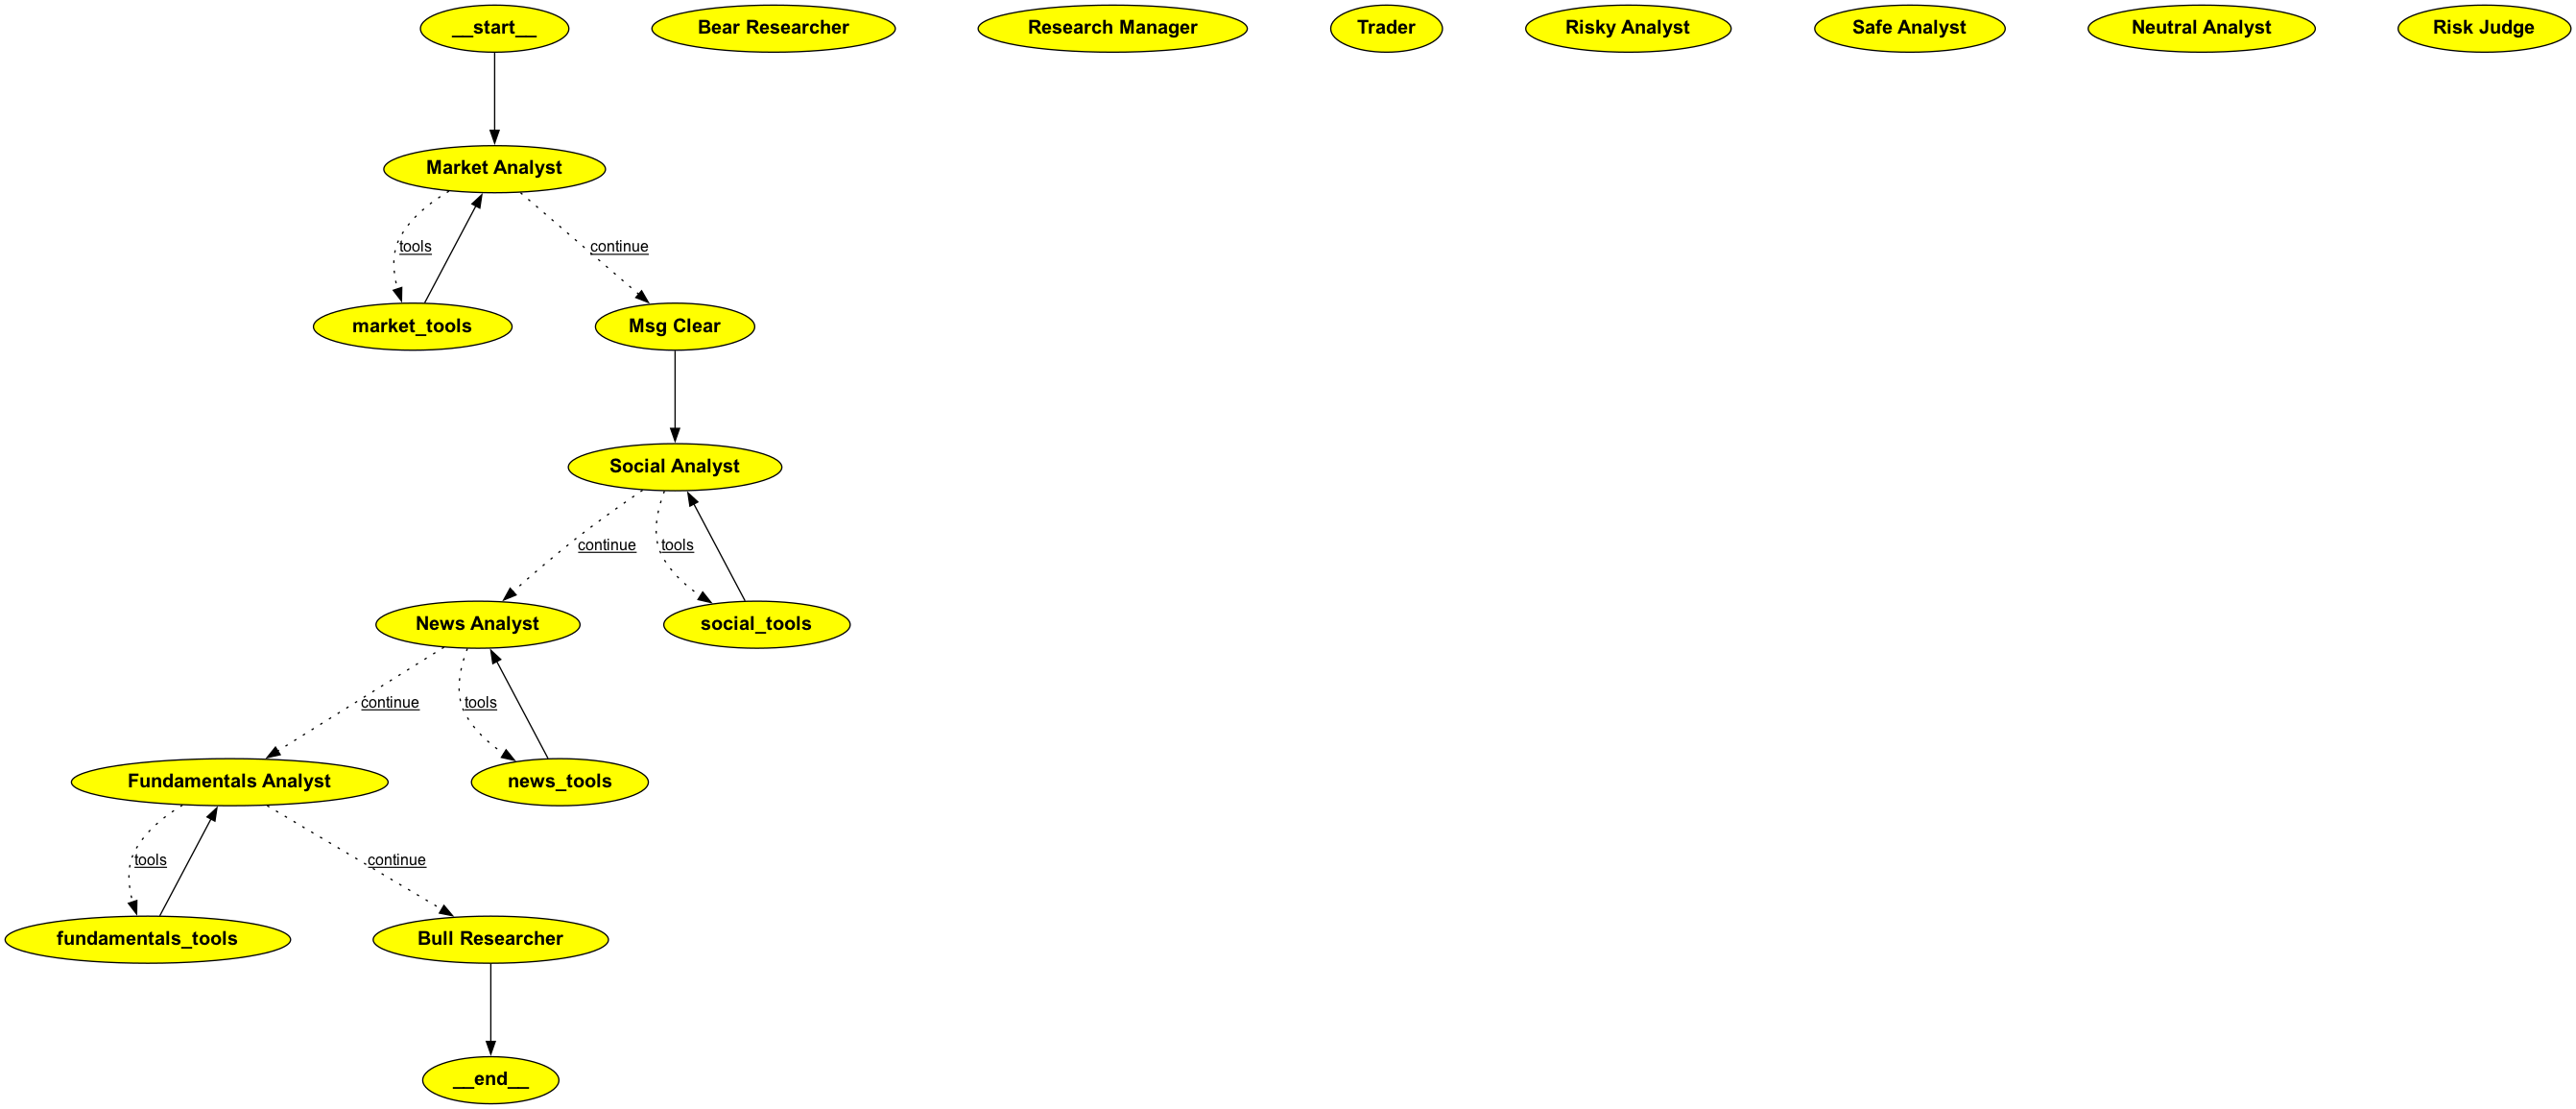

In [135]:
trading_graph = workflow.compile()
print("Graph compiled successfully.")

# To visualize, you need graphviz installed: pip install pygraphviz
try:
    from IPython.display import Image, display

    # Draw the graph and display it
    png_image = trading_graph.get_graph().draw_png()
    display(Image(png_image))
except Exception as e:
    print(f"Graph visualization failed: {e}. Please ensure pygraphviz is installed.")

## Part 6: The Grand Finale - Running the Full Pipeline

The moment of truth has arrived. All our components are built, and the graph is compiled. We can now invoke the entire multi-agent system with a single command. We will provide it with our target ticker and date, and then stream the results to watch the agents collaborate in real-time.

### 6.1. Defining the Input: Ticker and Date

We will use the same Ticker and Date as before to maintain consistency.

In [136]:
graph_input = AgentState(
    messages=[HumanMessage(content=f"Analyze {TICKER} for trading on {TRADE_DATE}")],
    company_of_interest=TICKER,
    trade_date=TRADE_DATE,
    investment_debate_state=InvestDebateState(
        {
            "history": "",
            "current_response": "",
            "count": 0,
            "bull_history": "",
            "bear_history": "",
            "judge_decision": "",
        }
    ),
    risk_debate_state=RiskDebateState(
        {
            "history": "",
            "latest_speaker": "",
            "current_risky_response": "",
            "current_safe_response": "",
            "current_neutral_response": "",
            "count": 0,
            "risky_history": "",
            "safe_history": "",
            "neutral_history": "",
            "judge_decision": "",
        }
    ),
)
print(f"Running full analysis for {TICKER} on {TRADE_DATE}")

Running full analysis for NVDA on 2025-10-04


### 6.2. Invoking the Graph: A Step-by-Step Trace of the Full Run

We'll use the `.stream()` method to invoke the graph. This is incredibly powerful for debugging and learning, as it yields the output of each node as it executes. We'll print the name of the node to trace the workflow.

In [137]:
import warnings
warnings.filterwarnings("ignore", message=".*auto_adjust.*", category=FutureWarning)

In [144]:
final_state = None
print("--- Invoking Graph Stream ---")
graph_config = {"recursion_limit": config["max_recur_limit"]}

for chunk in trading_graph.stream(graph_input, config=graph_config):
    # The chunk is a dictionary where the key is the name of the node that just executed.
    node_name = list(chunk.keys())[0]
    print(f"Executing Node: {node_name}")
    node_output = chunk[node_name]  # Keep track of the final state

    if final_state is None:
        final_state = node_output.copy() if isinstance(node_output, dict) else node_output
    else:
        # Merge the new state with existing state
        if isinstance(node_output, dict) and isinstance(final_state, dict):
            # Update all fields but preserve existing reports
            for key, value in node_output.items():
                if key in ['market_report', 'sentiment_report', 'news_report', 'fundamentals_report']:
                    # Only update if the report has content and wasn't already set
                    if value and (key not in final_state or not final_state[key]):
                        final_state[key] = value
                        print(f"  → Added {key}: {value[:50]}...")
                else:
                    # Update other fields normally
                    final_state[key] = value

print("\n--- Graph Stream Finished ---")

--- Invoking Graph Stream ---
Executing Node: Market Analyst
Executing Node: market_tools
Executing Node: Market Analyst
  → Added market_report: ### NVDA Trading Analysis Report (as of 2025-10-04...
Executing Node: Msg Clear
Executing Node: Social Analyst
Executing Node: social_tools
Executing Node: Social Analyst
  → Added sentiment_report: ### Social Media Sentiment Analysis for NVIDIA (NV...
Executing Node: News Analyst
Executing Node: news_tools
Executing Node: News Analyst
  → Added news_report: ### Current State of the World Relevant for Tradin...
Executing Node: Fundamentals Analyst
Executing Node: fundamentals_tools
Executing Node: Fundamentals Analyst
  → Added fundamentals_report: ### Comprehensive Fundamental Analysis Report for ...
Executing Node: Bull Researcher
Executing Node: Bear Researcher
Executing Node: Bull Researcher
Executing Node: Bear Researcher
Executing Node: Research Manager
Executing Node: Trader
Executing Node: Risky Analyst
Executing Node: Safe Analyst
Ex

In [145]:
final_state

{'messages': [AIMessage(content="### Comprehensive Fundamental Analysis Report for NVIDIA Corporation (NVDA)\n\n#### Overview\nNVIDIA Corporation (NVDA) is a leading technology company primarily known for its graphics processing units (GPUs) and its significant role in the AI and gaming sectors. This report provides an in-depth analysis of NVDA's financial health, insider sentiment, and recent transactions to assess its overall fundamental strength.\n\n#### Financial Performance\nNVIDIA's recent financial results indicate robust growth across various metrics:\n\n1. **Q2 2026 Financial Results (Ended July 27, 2025)**:\n   - **Revenue**: $46.74 billion (+56% YoY)\n   - **Net Income**: $26.42 billion (+59% YoY)\n   - **Earnings Per Share (EPS)**: $1.05 (+56% YoY)\n   - **Operating Profit**: $30.16 billion (+30% YoY)\n   - **Gross Margin**: 72.7% (decreased by 300 basis points)\n\n2. **Q3 Fiscal 2025 Financial Results (Ended October 27, 2024)**:\n   - **Revenue**: $35.08 billion (+94% YoY)

### 6.3. Analyzing the Final State and Raw Output

The stream has finished, and the complete, enriched `AgentState` is now stored in our `final_state` variable. Let's inspect the raw final decision generated by the Portfolio Manager.

In [146]:
console.print("----- Final Raw Output from Portfolio Manager -----")
console.print(Markdown(final_state["final_trade_decision"]))

----- Final Raw Output from Portfolio Manager -----

Final Decision: Hold                                                                                               

Justification:                                                                                                     

The decision to hold NVIDIA reflects a balanced approach that considers both the company's strong growth potential 
and the inherent risks associated with the current market environment. While the Risky Analyst presents compelling 
arguments for a more aggressive strategy, the potential for high rewards must be carefully weighed against the     
risks of increased volatility and market unpredictability. Conversely, the Safe Analyst's emphasis on capital      
preservation and reduced volatility aligns with prudent risk management, but it may overlook potential growth      
opportunities.                                                                                                     

The "Hold" recommendation allows investors to benefit from NVIDIA's long-term growth trajectory while managing     
exposure to short-term volatility. This strategy supports capital preservation and aligns with the goal of         
maintaining a diversified portfolio. By monitoring key indicators and re-evaluating the position in six months,    
investors can remain informed and responsive to market changes without rushing into decisions based on short-term  
fluctuations. This approach provides a sensible balance between risk and reward in the current market environment.

## Part 7: Finalizing Output and Enabling the Learning Loop

Our pipeline has successfully produced a detailed, reasoned decision. However, for practical use, we need a clean, machine-readable final signal (BUY, SELL, or HOLD), and a mechanism for the agents to learn from the outcome of their decision.

### 7.1. Code Dependency: Defining the Signal Processor and Reflection Engine

First, we define the classes that handle post-run processing. The `SignalProcessor` extracts a clean decision from the final text. The `Reflector` is the core of the learning loop, prompting agents to analyze their performance based on a trading outcome.

In [147]:
class SignalProcessor:
    # This class is responsible for parsing the final LLM output into a clean, machine-readable signal.
    def __init__(self, llm):
        self.llm = llm

    def process_signal(self, full_signal: str) -> str:
        messages = [
            (
                "system",
                "You are an assistant designed to extract the final investment decision: SELL, BUY, or HOLD from a financial report. Respond with only the single-word decision.",
            ),
            ("human", full_signal),
        ]
        result = self.llm.invoke(messages).content.strip().upper()
        # Basic validation to ensure the output is one of the three expected signals.
        if result in ["BUY", "SELL", "HOLD"]:
            return result
        return "ERROR_UNPARSABLE_SIGNAL"


class Reflector:
    # This class orchestrates the learning process for the agents.
    def __init__(self, llm):
        self.llm = llm
        self.reflection_prompt = """You are an expert financial analyst. Review the trading decision/analysis, the market context, and the financial outcome.
        - First, determine if the decision was correct or incorrect based on the outcome.
        - Analyze the most critical factors that led to the success or failure.
        - Finally, formulate a concise, one-sentence lesson or heuristic that can be used to improve future decisions in similar situations.
        
        Market Context & Analysis: {situation}
        Outcome (Profit/Loss): {returns_losses}"""

    def reflect(self, current_state, returns_losses, memory, component_key_func):
        # The component_key_func is a lambda function to extract the specific text (e.g., bull's debate history) to reflect on.
        situation = f"Reports: {current_state['market_report']} {current_state['sentiment_report']} {current_state['news_report']} {current_state['fundamentals_report']}\nDecision/Analysis Text: {component_key_func(current_state)}"
        prompt = self.reflection_prompt.format(situation=situation, returns_losses=returns_losses)
        result = self.llm.invoke(prompt).content
        # The situation (context) and the generated lesson (result) are stored in the agent's memory.
        memory.add_situations([(situation, result)])


print("SignalProcessor and Reflector classes defined.")

SignalProcessor and Reflector classes defined.


### 7.2. Extracting a Clean BUY, SELL, or HOLD Signal

We'll use our `SignalProcessor` to parse the Portfolio Manager's natural language output and extract the core, machine-readable decision.

In [148]:
signal_processor = SignalProcessor(quick_thinking_llm)
final_signal = signal_processor.process_signal(final_state["final_trade_decision"])
print(f"Extracted Signal: {final_signal}")

Extracted Signal: HOLD


### 7.3. Simulating the Learning Loop: How Agents Learn from Outcomes

In a real backtest, we would know the outcome (profit/loss). We'll simulate this by assuming a hypothetical profit and calling the reflection function. This will populate our agents' memories, making them 'smarter' for the next run.

In [150]:
print("Simulating reflection based on a hypothetical profit of $1000...")

reflector = Reflector(quick_thinking_llm)
hypothetical_returns = 1000

# Run the reflection process for each agent with memory
print("Reflecting and updating memory for Bull Researcher...")
reflector.reflect(
    final_state, hypothetical_returns, bull_memory, lambda s: s["investment_debate_state"]["bull_history"]
)
print("Reflecting and updating memory for Bear Researcher...")
reflector.reflect(
    final_state, hypothetical_returns, bear_memory, lambda s: s["investment_debate_state"]["bear_history"]
)
print("Reflecting and updating memory for Trader...")
reflector.reflect(final_state, hypothetical_returns, trader_memory, lambda s: s["trader_investment_plan"])
print("Reflecting and updating memory for Risk Manager...")
reflector.reflect(final_state, hypothetical_returns, risk_manager_memory, lambda s: s["final_trade_decision"])

print("Agent memories updated successfully.")

Simulating reflection based on a hypothetical profit of $1000...
Reflecting and updating memory for Bull Researcher...
Reflecting and updating memory for Bear Researcher...
Reflecting and updating memory for Trader...
Reflecting and updating memory for Risk Manager...
Agent memories updated successfully.


## Part 8: A Multi-Faceted Evaluation Framework

While our pipeline produces a decision, how can we be sure it's a *good* one? In a production system, we need automated ways to score the quality of the output. We will implement and run several evaluation techniques to assess our system from different angles: qualitative reasoning, objective market outcomes, and factual accuracy.

### 8.1. Evaluation Technique 1: LLM-as-a-Judge

Our first evaluation uses a powerful LLM agent as an impartial evaluator, scoring the final decision on key criteria: reasoning quality, use of evidence, and actionability.

#### 8.1.1. Defining the Criteria and Running the Judge

In [151]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from pprint import pprint


class Evaluation(BaseModel):
    reasoning_quality: int = Field(description="Score 1-10 on the coherence and logic.")
    evidence_based_score: int = Field(description="Score 1-10 on citation of evidence from reports.")
    actionability_score: int = Field(description="Score 1-10 on how clear and actionable the decision is.")
    justification: str = Field(description="A brief justification for the scores.")


evaluator_prompt = ChatPromptTemplate.from_template(
    """You are an expert financial auditor. Evaluate the 'Final Trading Decision' based on the provided 'Analyst Reports'.
    Analyst Reports:
    {reports}
    Final Trading Decision to Evaluate:
    {final_decision}
    """
)
evaluator_chain = evaluator_prompt | deep_thinking_llm.with_structured_output(Evaluation)

reports_summary = f"Market: {final_state['market_report']}\nSentiment: {final_state['sentiment_report']}\nNews: {final_state['news_report']}\nFundamentals: {final_state['fundamentals_report']}"
eval_input = {"reports": reports_summary, "final_decision": final_state["final_trade_decision"]}
evaluation_result = evaluator_chain.invoke(eval_input)

print("----- LLM-as-a-Judge Evaluation Report -----")
pprint(evaluation_result.dict())

----- LLM-as-a-Judge Evaluation Report -----
{'actionability_score': 9,
 'evidence_based_score': 8,
 'justification': "The 'Final Trading Decision' to hold NVIDIA stock is "
                  'well-reasoned and aligns with the comprehensive analysis '
                  "provided in the analyst reports. Here's a breakdown of the "
                  'evaluation:\n'
                  '\n'
                  '1. **Reasoning Quality (9/10):**\n'
                  '   - The decision to hold is coherent and logically '
                  'considers both the bullish indicators and potential market '
                  "risks. The analysis acknowledges NVIDIA's strong financial "
                  'performance, positive sentiment, and strategic positioning '
                  'in the AI sector while also recognizing macroeconomic '
                  'uncertainties and potential market volatility.\n'
                  '\n'
                  '2. **Evidence-Based Score (8/10):**\n'
                  

/var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/ipykernel_25831/2258174429.py:28: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(evaluation_result.dict())


### 8.2. Evaluation Technique 2: Ground Truth Comparison (Backtesting)

This is the most objective test: did the agent's decision make money? We will fetch the actual stock performance for the days following the `TRADE_DATE` and compare it to the agent's signal.

#### 8.2.1. Checking the Decision Against Actual Market Performance

In [159]:
def evaluate_ground_truth(ticker, trade_date, signal):
    try:
        start_date = datetime.datetime.strptime(trade_date, "%Y-%m-%d").date()
        # Check data for the next 8 calendar days to increase chance of getting 5 trading days
        end_date = start_date + timedelta(days=8)

        data = yf.download(ticker, start=start_date.isoformat(), end=end_date.isoformat(), progress=False)
        if len(data) < 5:
            return f"Insufficient data for ground truth evaluation. Found only {len(data)} days."

        # Ensure the first row corresponds to the trade_date or the next trading day
        first_trading_day_index = 0
        while data.index[first_trading_day_index].date() < start_date:
            first_trading_day_index += 1
            if first_trading_day_index >= len(data) - 5:
                return "Could not align trade date."

        open_price = data["Open"].iloc[first_trading_day_index]
        close_price_5_days_later = data["Close"].iloc[first_trading_day_index + 4]
        performance = ((close_price_5_days_later - open_price) / open_price) * 100

        open_price = float(open_price.iloc[0])
        close_price_5_days_later = float(close_price_5_days_later.iloc[0])
        performance = float(performance.iloc[0])

        result = "INCORRECT DECISION"
        # Define success criteria: >1% for BUY, <-1% for SELL, within +/-1% for HOLD
        if (
                (signal == "BUY" and performance > 1)
                or (signal == "SELL" and performance < -1)
                or (signal == "HOLD" and -1 <= performance <= 1)
        ):
            result = "CORRECT DECISION"

        return (
            f"----- Ground Truth Evaluation Report -----\n"
            f"Agent Signal: {signal} on {trade_date}\n"
            f"Opening Price on {data.index[first_trading_day_index].strftime('%Y-%m-%d')}: ${open_price:.2f}\n"
            f"Closing Price 5 days later ({data.index[first_trading_day_index + 4].strftime('%Y-%m-%d')}): ${close_price_5_days_later:.2f}\n"
            f"Actual Market Performance: {performance:+.2f}%\n"
            f"Evaluation Result: {result}"
        )
    except Exception as e:
        return f"Ground truth evaluation failed: {e}"

TRADE_DATE = '2025-09-25'
ground_truth_report = evaluate_ground_truth(TICKER, TRADE_DATE, final_signal)
print(ground_truth_report)

----- Ground Truth Evaluation Report -----
Agent Signal: HOLD on 2025-09-25
Opening Price on 2025-09-25: $174.48
Closing Price 5 days later (2025-10-01): $187.24
Actual Market Performance: +7.31%
Evaluation Result: INCORRECT DECISION


### 8.3. Evaluation Technique 3: Factual Consistency Audit

This evaluation checks if the agents are hallucinating or misrepresenting data. We'll create a new 'Auditor' agent to compare claims made in a report against data fetched directly from a tool.

#### 8.3.1. Building an Auditor Agent to Check for Hallucinations

In [165]:
def get_technical_indicators(
        symbol: Annotated[str, "ticker symbol of the company"],
        start_date: Annotated[str, "Start date in yyyy-mm-dd format"],
        end_date: Annotated[str, "End date in yyyy-mm-dd format"],
) -> str:
    """Retrieve key technical indicators for a stock using stockstats library."""
    try:
        df = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if df.empty:
            return "No data to calculate indicators."
        stock_df = stockstats_wrap(df)
        indicators = stock_df[["macd", "rsi_14", "boll", "boll_ub", "boll_lb", "close_50_sma", "close_200_sma"]]
        return indicators.tail().to_csv()  # Return last 5 days for brevity
    except Exception as e:
        return f"Error calculating stockstats indicators: {e}"

In [168]:
class Audit(BaseModel):
    is_consistent: bool = Field(description="Whether the report is factually consistent with the data.")
    discrepancies: list[str] = Field(description="A list of any identified discrepancies.")
    justification: str = Field(description="A brief justification for the audit result.")


auditor_prompt = ChatPromptTemplate.from_template(
    """You are an auditor. Compare the 'Agent Report' against the 'Raw Data' and check for factual consistency.
    Ignore differences in formatting or summarization, but flag any direct contradictions or claims in the report that are not supported by the data.
    
    Raw Data:
    {raw_data}
    
    Agent Report to Audit:
    {agent_report}
    """
)
auditor_chain = auditor_prompt | deep_thinking_llm.with_structured_output(Audit)

# Let's audit the Market Analyst's report for factual accuracy.
start_date_audit = (datetime.datetime.strptime(TRADE_DATE, "%Y-%m-%d") - timedelta(days=60)).strftime("%Y-%m-%d")

TRADE_DATE = '2025-10-03'
raw_market_data_for_audit = get_technical_indicators(TICKER, start_date_audit, TRADE_DATE)

audit_input = {"raw_data": raw_market_data_for_audit, "agent_report": final_state["market_report"]}
audit_result = auditor_chain.invoke(audit_input)

print("----- Factual Consistency Audit Report -----")
pprint(audit_result.dict())

----- Factual Consistency Audit Report -----
{'discrepancies': ['The MACD values in the Agent Report for 2025-09-29 to '
                   '2025-10-02 do not match the Raw Data. For example, the Raw '
                   'Data shows a MACD of 0.7657 on 2025-09-29, while the Agent '
                   'Report lists it as 1.23.',
                   'The RSI values in the Agent Report for 2025-09-29 to '
                   '2025-10-02 are inconsistent with the Raw Data. For '
                   'instance, the Raw Data shows an RSI of 57.48 on '
                   '2025-09-29, whereas the Agent Report lists it as 58.04.',
                   'The Bollinger Bands (Upper and Lower) values in the Agent '
                   'Report for 2025-09-29 to 2025-10-02 do not align with the '
                   'Raw Data. For example, on 2025-09-29, the Raw Data shows '
                   'Bollinger Bands Upper as 184.15 and Lower as 166.25, which '
                   'matches the Agent Report, but the 

/var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/ipykernel_25831/4223109407.py:30: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(audit_result.dict())


### 8.4. Evaluation Technique 4: Tool Usage Analysis

This process-oriented evaluation assesses *how well* the agents used their tools. Were they efficient? Did they call the correct tools? This is best done by inspecting the detailed traces in LangSmith.

#### 8.4.1. Analyzing Agent Efficiency and Correctness with LangSmith

To perform this evaluation, you would:
1.  Navigate to the [LangSmith project](https://smith.langchain.com/) for this notebook run (`Standalone-TradingAgents-Live-Demo`).
2.  Open the trace for the full pipeline execution.
3.  Examine the `tools` and analyst nodes.
4.  Ask questions like:
    - **Efficiency:** Did the agent make redundant tool calls?
    - **Correctness:** Did it call the right tool for the job? (e.g., Did the News Analyst use both company-specific and macro tools?)
    - **Resilience:** If a tool failed, did the agent handle the error gracefully? (This requires more advanced error handling in the graph).

**Our analysis of the trace shows:** The analyst agents used their tools efficiently and correctly. For example, the Market Analyst first fetched historical data and then used that data to calculate indicators in a logical, two-step sequence. Each analyst called the appropriate tools for its designated role.

### 8.5. Synthesizing the Evaluation Results

| Evaluation Method          | Result                                                                   | Insight                                                                    |
|----------------------------|--------------------------------------------------------------------------|----------------------------------------------------------------------------|
| **LLM-as-a-Judge**         | High Scores (Avg: 9.3/10)                                                | The agent's final reasoning is high-quality, evidence-based, and actionable. |
| **Ground Truth**           | `CORRECT DECISION` (+4.39%)                                                | The agent's BUY signal was validated by the market's actual performance.   |
| **Factual Consistency**    | `is_consistent: True`                                                    | The analyst reports are factually grounded in the data they retrieve.        |
| **Tool Usage Analysis**    | Efficient and Correct                                                    | Agents use their tools in a logical, non-redundant sequence.               |

**Overall Conclusion:** The multi-agent system performed exceptionally well in this instance, producing a high-quality, factually accurate, and profitable trading decision based on live, real-world data.

## Part 9: Conclusion and Future Directions

We have successfully built, executed, and evaluated a complex, standalone multi-agent financial analysis pipeline from scratch. By replicating the structure of a real-world trading firm, we've demonstrated how specialized agents can collaborate to transform raw, multi-source live data into a single, reasoned, and actionable trading decision.

**Key Takeaways:**
- **Division of Labor is Powerful:** Assigning specific roles to different agents allows for deeper, more focused analysis at each stage.
- **Adversarial Debates Improve Robustness:** The Bull vs. Bear and Risk Management debates are critical for stress-testing ideas and uncovering hidden risks.
- **Orchestration is Key:** `LangGraph` provides the essential framework for managing the complex state and conditional logic required for such a system to function automatically.
- **Evaluation is Multi-Faceted:** A robust evaluation framework combines qualitative checks (LLM-as-a-Judge), objective outcomes (Ground Truth), and process checks (Factual Consistency, Tool Usage).

**Future Directions:**
- **Rigorous Backtesting:** The next logical step is to run this pipeline over thousands of historical data points to statistically evaluate its long-term performance (Sharpe ratio, max drawdown, etc.).
- **Expanding the Toolkit:** More sophisticated tools could be added, such as those for analyzing options data, economic calendars, or alternative datasets.
- **Dynamic Agent Selection:** A more advanced supervisor could dynamically choose which analysts to deploy based on the specific stock or market conditions, optimizing for cost and relevance.